# Разработка компании для интернет магазина "Стримчик"

**Описание проекта**

Интернет магазин "Стримчик" - осуществляет продажу компьютерных игр по всему миру.

Был предоставлен датасет содержащий продажи компьютерных игр за период до 2016 года.

**Цель проекта:**

Произвести анализ и исследование данных и определить параметры, которые влияют на успешность игр. Результаты будут использоваться для разработки компании на следующий год.

**Структура проекта:**

Данный проект можно разделить на 4 Блока:
1. Анализ данных - в рамках которого будут составлены общие выводы о первичных данных и даны рекомендации в отношении предобработки.
2. Предобработка данных - выполнена на основе выводов из предыдущего блока.
3. Исследование данных, в рамках блока будет проведена работа:
- Более глубокий исследовательский анализ данных;
- Составление портретов среднестатистических пользователей каждого региона;
- Проверка гипотез
4. Общие выводы и рекомендации.

## Анализ данных

### Знакомство с данными

Для начала необходимо ознакомится с данными из имеющегося датафрейма. Рассмотреть основные показатели, общую информацию и проанализировать ошибки в данных.

In [1]:
#Импортируем библиотеки, необходимые для анализа.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

Сохраним данные в переменную `data` и выведем датафрейм на экран

In [2]:
#импортируем датафрейм и выведем на экран

data = pd.read_csv('/datasets/games.csv')

data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
#рассмотрим общую информацию о датафрейме

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Из полученной информации можно выделить следующие ключевые моменты:
- в датафрейме 16715 строк c данными;
- представлено 11 параметров данных;
- имеются нулевые значения;
- данные записаны с использованием заглавных букв;
- некоторые парамаетры имеют некорректный тип данных.

**Вывод:** данные имеют предпосылки для проведения предобработки данных. Для составления планы работы по предобработке данных необходимо проанализировать детально каждый параметр.

### Анализ параметров датафрейма

В анализируемом датафрейме имеется 11 параметров: 

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Проведем детальный анализ каждого параметра.

#### `Name` — название игры

Рассмотрим основные данные по данному параметру, построим график, а также сформируем рекомендации по предобработке данного параметра.

In [4]:
#определим общую информацию
print('Общая информация о параметре:')
print(data['Name'].describe(), '\n')

#определим количество нулевых занчений
print('Количество нулевых значений:')
print(data['Name'].isna().sum(), '\n')

Общая информация о параметре:
count                           16713
unique                          11559
top       Need for Speed: Most Wanted
freq                               12
Name: Name, dtype: object 

Количество нулевых значений:
2 



Давайте более детально рассмотрим повторы - согласно информации чаще всего встречается игра с названием **"Need for Speed: Most Wanted"**, рассмотрим все повторы более детально.

In [5]:
data.query('Name == "Need for Speed: Most Wanted"')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Также рассмотрим более детально пропуски

In [6]:
data.query('Name.isna()')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**Вывод по параметру:** Name — название игры.

В данном параметре представлены название игр. В данных есть как повторы, так и пропуски, при этом:
- повторы вызваны тем, что игра с одним названием реализована на разных платформах (PC, PS, Xbox), также (как например с серией Need for Speed: Most Wanted) в 2012 году было переиздание игры под старым названием. Все это не является аномальными значениями и не подлежит удалению из популяции.
- пропуски в данных - критическая ошибка, не зная названия нельзя никак идентифицировать игру. Такие данные необходимо удалить в рамках предобработки данных.

**Рекомендации для предобработки:** 
удалить данные с пустыми значениями

#### `Platform` — платформа

Рассмотрим основные данные по данному параметру, построим график, а также сформируем рекомендации по предобработке данного параметра.

Общая информация о параметре:
count     16715
unique       31
top         PS2
freq       2161
Name: Platform, dtype: object 

Количество нулевых значений:
0 

Перечень уникальных значений:
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX'] 

Частота уникальных значений в популяции:
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64


Text(0, 0.5, 'Игры, шт.')

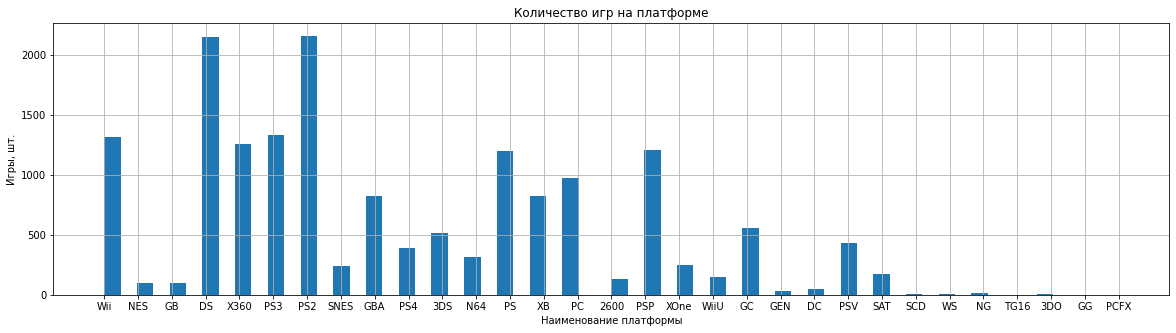

In [7]:
#определим общую информацию
print('Общая информация о параметре:')
print(data['Platform'].describe(), '\n')

#определим количество нулевых значений
print('Количество нулевых значений:')
print(data['Platform'].isna().sum(), '\n')

#определим перечень уникальных значений
print('Перечень уникальных значений:')
print(data['Platform'].unique(), '\n')


#определим количество каждого уникального значения
print('Частота уникальных значений в популяции:')
print(data['Platform'].value_counts())

#Построим график для параметра:
data['Platform'].hist(figsize = (20,5), bins = 62)
plt.title('Количество игр на платформе')
plt.xlabel("Наименование платформы")
plt.ylabel("Игры, шт.")

In [8]:
#рассмотрим игры на менее популярных платформах (меньше 10 игр)
not_popular_platform = ['PCFX', 'GG', 'TG16', '3DO', 'WS', 'SCD', 'NG']

data[data.Platform.isin(not_popular_platform)]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1263,Sonic CD,SCD,1993.0,Platform,1.0,0.36,0.09,0.05,NaN,NaN,NaN
3926,Final Fantasy,WS,2000.0,Role-Playing,0.0,0.00,0.51,0.00,NaN,NaN,NaN
6110,Digimon Adventure: Anode Tamer,WS,1999.0,Role-Playing,0.0,0.00,0.28,0.00,NaN,NaN,NaN
6650,Final Fantasy II,WS,2001.0,Role-Playing,0.0,0.00,0.25,0.00,NaN,NaN,NaN
6663,Samurai Shodown II,NG,1994.0,Fighting,0.0,0.00,0.25,0.00,NaN,NaN,NaN
7017,The King of Fighters '95 (CD),NG,1994.0,Fighting,0.0,0.00,0.23,0.00,NaN,NaN,NaN
7499,The King of Fighters '95,NG,1995.0,Fighting,0.0,0.00,0.20,0.00,NaN,NaN,NaN
7542,Samurai Spirits (CD),NG,1994.0,Fighting,0.0,0.00,0.20,0.00,NaN,NaN,NaN
8039,Chocobo no Fushigi Dungeon for WonderSwan,WS,1999.0,Role-Playing,0.0,0.00,0.18,0.00,NaN,NaN,NaN
8294,Super Robot Taisen Compact 2 Dai-1-Bu,WS,2000.0,Strategy,0.0,0.00,0.17,0.00,NaN,NaN,NaN


**Вывод по параметру:** Platform — платформа

В данном параметре представлены наименования игровых платформ на которых реализованы игры.
Из проведенного анализа параметра можно отметить следующие ключевые моменты:
- в параметре отсутствуют пустые значения;
- имеются 31 уникальных значения;
- большая часть популяции у платформ PS2 и DS (**25%** популяции);
- неявные дубликаты отсутствуют;
- имеются 5 платформ на которых представлено менее 10 игр.

**Рекомендации для предобработки:** 
данные являются полными, предпосылки для предобработки отсутствуют.

#### `Year_of_Release` — год выпуска

Рассмотрим основные данные по данному параметру, построим график, а также сформируем рекомендации по предобработке данного параметра.

Общая информация о параметре:
count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: Year_of_Release, dtype: float64 

Количество нулевых значений:
269 

Перечень уникальных значений:
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.] 

Количество уникальных значений:
38 

Частота уникальных значений в популяции:
2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1

Text(0, 0.5, 'Игры, шт.')

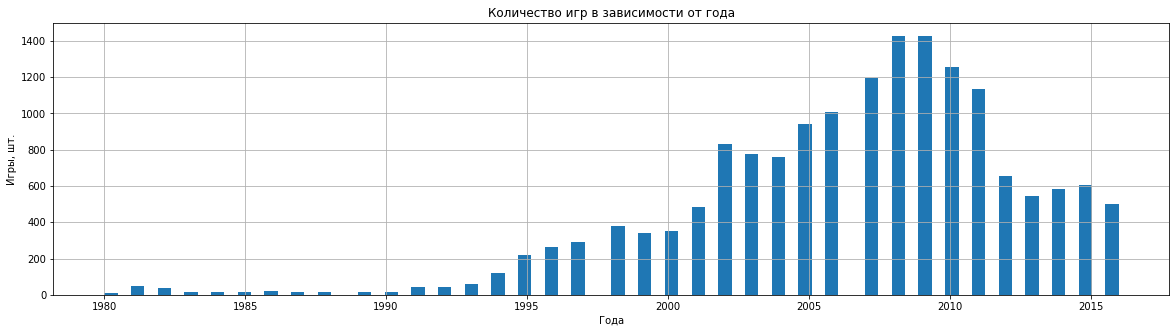

In [9]:
#определим общую информацию
print('Общая информация о параметре:')
print(data['Year_of_Release'].describe(), '\n')

#определим количество нулевых значений
print('Количество нулевых значений:')
print(data['Year_of_Release'].isna().sum(), '\n')

#определим перечень уникальных значений и посчитаем их количество
print('Перечень уникальных значений:')
print(data['Year_of_Release'].unique(), '\n')

print('Количество уникальных значений:')
print(len(data['Year_of_Release'].unique()), '\n')


#определим количество каждого уникального значения
print('Частота уникальных значений в популяции:')
print(data['Year_of_Release'].value_counts())

#Построим график для параметра:
data['Year_of_Release'].hist(figsize = (20,5), bins = 76)
plt.title('Количество игр в зависимости от года')
plt.xlabel("Года")
plt.ylabel("Игры, шт.")

In [10]:
#получим перечень уникальных значений платформ для пустых значений
print(data[data['Year_of_Release'].isna()]['Platform'].unique())

#рассмотрим пустые значения
data[data['Year_of_Release'].isna()]

['PS2' 'Wii' '2600' 'X360' 'GBA' 'PC' 'PS3' 'PS' 'PSP' 'XB' 'GB' 'DS' 'GC'
 '3DS' 'N64' 'PSV']


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Вывод по параметру:** Year_of_Release — год выпуска

В данном параметре представлены годы, в которых вышли компьютерные игры. 

В данном параметре можно выделить следующие ключевые моменты:
- больше всего игр были выпущены в период с 2005 по 2010 гг;
- количество уникальных значений для годов выхода игр - 31, при этом самая старая игра вышла в 1980 г., а самая новая - 2016 г.
- в параметре присутствуют 269 нулевых значений;

**Рекомендации для предобработки:**
В популяции представлены 269 нулевых значений, при этом данные значения представлены по 16 платформам. В связи с тем, что игровые платформы достаточно часто обновляются - можно предположить, что медианное значение по платформе не будет иметь слишком большой разброс по годам (1-5 лет), так как для всех строк имеется значение параметра "Platform" - пустые значения можно будет заполнить медианным значением по платформе.


#### `Genre` — жанр игры

Рассмотрим основные данные по данному параметру, построим график, а также сформируем рекомендации по предобработке данного параметра.

Общая информация о параметре:
count      16713
unique        12
top       Action
freq        3369
Name: Genre, dtype: object 

Количество нулевых значений:
2 

Перечень уникальных значений:
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan] 

Количество уникальных значений:
13 

Частота уникальных значений в популяции:
Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64


Text(0, 0.5, 'Игры, шт.')

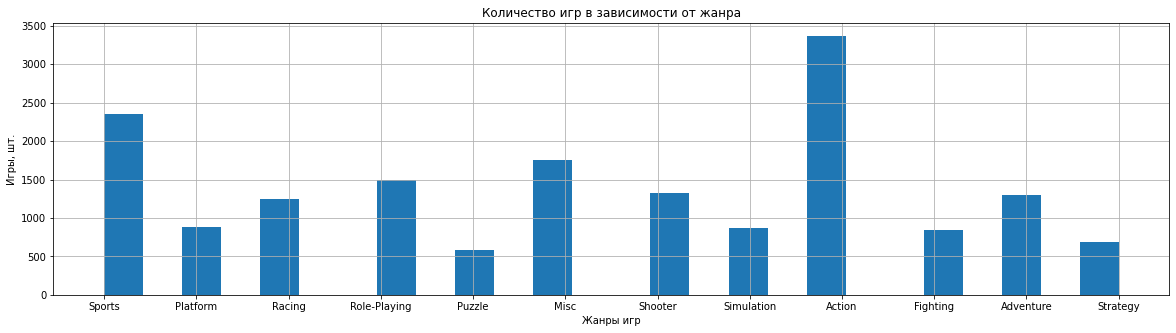

In [11]:
#определим общую информацию
print('Общая информация о параметре:')
print(data['Genre'].describe(), '\n')

#определим количество нулевых значений
print('Количество нулевых значений:')
print(data['Genre'].isna().sum(), '\n')

#определим перечень уникальных значений и посчитаем их количество
print('Перечень уникальных значений:')
print(data['Genre'].unique(), '\n')

print('Количество уникальных значений:')
print(len(data['Genre'].unique()), '\n')


#определим количество каждого уникального значения
print('Частота уникальных значений в популяции:')
print(data['Genre'].value_counts())

#Построим график для параметра:
data['Genre'].hist(figsize = (20,5), bins = 26)
plt.title('Количество игр в зависимости от жанра')
plt.xlabel("Жанры игр")
plt.ylabel("Игры, шт.")

In [12]:
#рассмотрим нулевые значения
data[data['Genre'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**Вывод по параметру:** Genre — жанр игры

Данный параметр указывает к какому жанру относится игра, и имеет следующие ключевые моменты:
- количество уникальных значений составляет 13(12+nan);
- больше всего в популяции преобладают игры жанра **"Action"**, на втором месте **"Sports"**. Меньше всего в популяции представлено игр жанра **"Puzzle"** и **"Strategy"**;
- неявные дубликаты отсутствуют.
- в популяции имеются 2 нулевых значения, однако они будут удалены в рамках предобработки данных по параметру `Name`.

**Рекомендации для предобработки:**
необходимость в дополнительной обработке отсутствует

#### `NA_sales` — продажи в Северной Америке (миллионы проданных копий)

Рассмотрим основные данные по данному параметру, построим график, а также сформируем рекомендации по предобработке данного параметра.



Общая информация о параметре:
count    16715.000000
mean         0.263377
std          0.813604
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: NA_sales, dtype: float64 

Количество нулевых значений:
0 

Частота уникальных значений в популяции:
0.00    4508
0.02     576
0.03     561
0.04     549
0.01     545
        ... 
4.12       1
8.41       1
1.97       1
3.70       1
3.43       1
Name: NA_sales, Length: 402, dtype: int64


Text(0, 0.5, 'Игры, шт.')

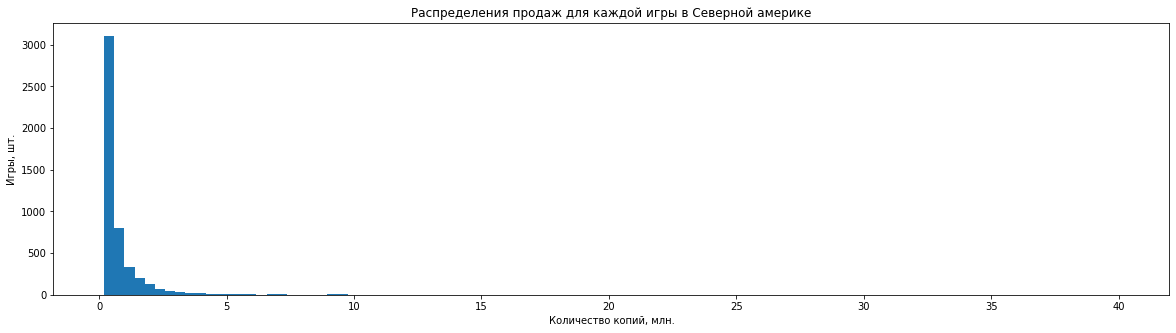

In [13]:
#определим общую информацию
print('Общая информация о параметре:')
print(data['NA_sales'].describe(), '\n')

#определим количество нулевых значений
print('Количество нулевых значений:')
print(data['NA_sales'].isna().sum(), '\n')

#определим количество каждого уникального значения
print('Частота уникальных значений в популяции:')
print(data['NA_sales'].value_counts())

#Построим график для параметра:
data['NA_sales'].plot(kind = 'hist', figsize = (20,5), bins = 100, range = (0.2, 40))
plt.title('Распределения продаж для каждой игры в Северной америке')
plt.xlabel("Количество копий, млн.")
plt.ylabel("Игры, шт.")


In [14]:
#Рассмотрим игры которые не продавались в северной америке
data.query('NA_sales <0.000001').head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
215,Monster Hunter Freedom 3,PSP,2010.0,Role-Playing,0.0,0.00,4.87,0.00,NaN,NaN,NaN
340,Friend Collection,DS,2009.0,Misc,0.0,0.00,3.67,0.00,NaN,NaN,NaN
385,Monster Hunter 4,3DS,2013.0,Role-Playing,0.0,0.00,3.44,0.00,NaN,NaN,NaN
403,English Training: Have Fun Improving Your Skills!,DS,2006.0,Misc,0.0,0.99,2.32,0.02,NaN,NaN,NaN
428,Dragon Quest VI: Maboroshi no Daichi,SNES,1995.0,Role-Playing,0.0,0.00,3.19,0.00,NaN,NaN,NaN
530,Dragon Quest V: Tenkuu no Hanayome,SNES,1992.0,Role-Playing,0.0,0.00,2.78,0.01,NaN,NaN,NaN
563,Yokai Watch 2 Shinuchi,3DS,2014.0,Role-Playing,0.0,0.00,2.68,0.00,NaN,NaN,NaN
574,Super Mario Bros.: The Lost Levels,NES,1986.0,Platform,0.0,0.00,2.65,0.00,NaN,NaN,NaN
632,Final Fantasy V,SNES,1992.0,Role-Playing,0.0,0.00,2.43,0.02,NaN,NaN,NaN
674,Dragon Warrior Monsters,GB,1998.0,Role-Playing,0.0,0.00,2.34,0.01,NaN,NaN,NaN


In [15]:
#Рассмотрим игры которые разошлись большим теражом в северной америке
data.query('NA_sales >5').head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Вывод по параметру:** NA_sales — продажи в Северной Америке (миллионы проданных копий)

Данный параметр указывет какое количество игр (млн. копий) было продано в Северной Америке. На основе первичного анализа можно сделать вывод:
- нулевые значения отсутствуют;
- в среднем было продано 263377 копий игр.
- минимальное значение продаж - 0, максимальное - 41 млн.
- согласно графику, большая часть игр (1/4 всей популяции) в Северной Америке имели спрос менее 0.1 млн. копий.

**Рекомендации для предобработки:**
при рассмотрении топ 15 игр по минимальным и максимальным продажам нельзя однозначно исключать игры с низкими продажами.
Необходимо провести более детальный анализ в совокупности с другими показателями продаж - так как некоторые игры могут не продаваться в Северной Америке. Стоит создать общий столбец `sales_total` - который будет отображаться общие продажи в мире.

#### `EU_sales` — продажи в Европе (миллионы проданных копий)

Рассмотрим основные данные по данному параметру, построим график, а также сформируем рекомендации по предобработке данного параметра.

Общая информация о параметре:
count    16715.000000
mean         0.145060
std          0.503339
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: EU_sales, dtype: float64 

Количество нулевых значений:
0 

Частота уникальных значений в популяции:
0.00    5870
0.01    1494
0.02    1308
0.03     926
0.04     709
        ... 
9.14       1
1.92       1
3.86       1
2.59       1
3.87       1
Name: EU_sales, Length: 307, dtype: int64


Text(0, 0.5, 'Игры, шт.')

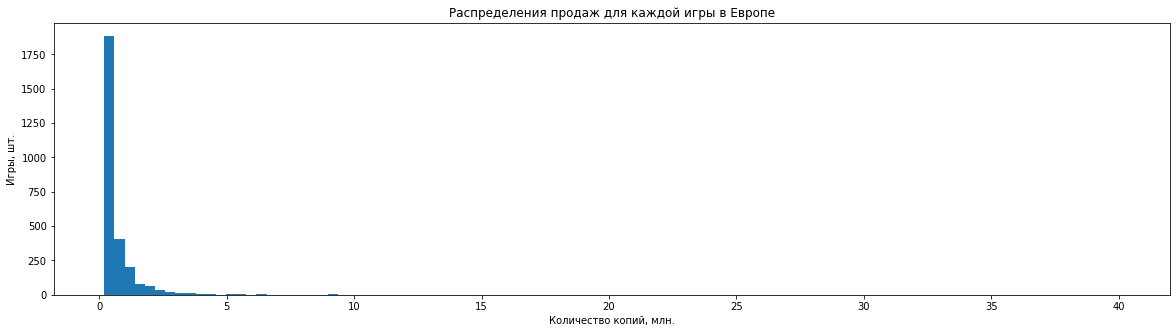

In [16]:
#определим общую информацию
print('Общая информация о параметре:')
print(data['EU_sales'].describe(), '\n')

#определим количество нулевых значений
print('Количество нулевых значений:')
print(data['EU_sales'].isna().sum(), '\n')

#определим количество каждого уникального значения
print('Частота уникальных значений в популяции:')
print(data['EU_sales'].value_counts())

#Построим график для параметра:
data['EU_sales'].plot(kind = 'hist', figsize = (20,5), bins = 100, range = (0.2, 40))
plt.title('Распределения продаж для каждой игры в Европе')
plt.xlabel("Количество копий, млн.")
plt.ylabel("Игры, шт.")

**Вывод по параметру:** EU_sales — продажи в Европе (миллионы проданных копий)

Данный параметр указывает какое количество игр (млн. копий) было продано в Европе. На основе первичного анализа можно сделать вывод:
- нулевые значения отсутствуют;
- в среднем было продано 145060 копий игр.
- минимальное значение продаж - 0, максимальное - 28 млн.
- согласно графику, большая часть игр (1/3 всей популяции) в Европе имели спрос менее 0.1 млн. копий.

**Рекомендации для предобработки:**
Аналогично предыдущему параметру.


#### `JP_sales` — продажи в Японии (миллионы проданных копий)

Рассмотрим основные данные по данному параметру, построим график, а также сформируем рекомендации по предобработке данного параметра.

Общая информация о параметре:
count    16715.000000
mean         0.077617
std          0.308853
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: JP_sales, dtype: float64 

Количество нулевых значений:
0 

Частота уникальных значений в популяции:
0.00    10514
0.02      741
0.01      706
0.03      546
0.04      397
        ...  
3.84        1
1.17        1
3.03        1
2.66        1
1.71        1
Name: JP_sales, Length: 244, dtype: int64


Text(0, 0.5, 'Игры, шт.')

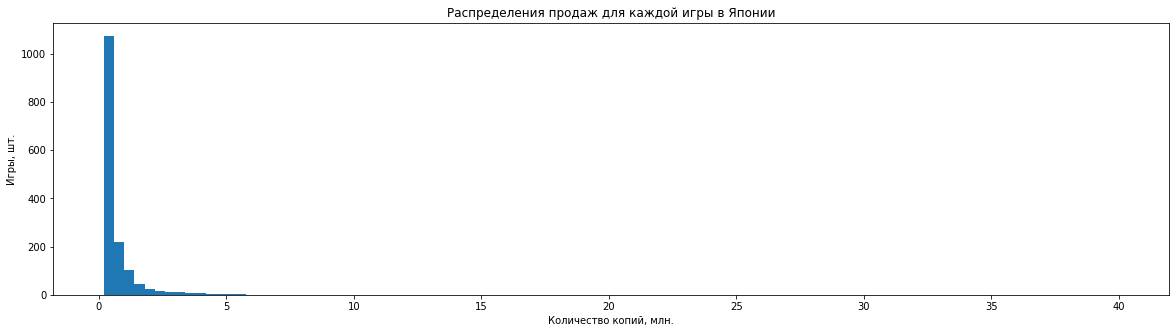

In [17]:
#определим общую информацию
print('Общая информация о параметре:')
print(data['JP_sales'].describe(), '\n')

#определим количество нулевых значений
print('Количество нулевых значений:')
print(data['JP_sales'].isna().sum(), '\n')

#определим количество каждого уникального значения
print('Частота уникальных значений в популяции:')
print(data['JP_sales'].value_counts())

#Построим график для параметра:
data['JP_sales'].plot(kind = 'hist', figsize = (20,5), bins = 100, range = (0.2, 40))
plt.title('Распределения продаж для каждой игры в Японии')
plt.xlabel("Количество копий, млн.")
plt.ylabel("Игры, шт.")

**Вывод по параметру:** JP_sales — продажи в Японии (миллионы проданных копий)

Данный параметр указывает какое количество игр (млн. копий) было продано в Японии. На основе первичного анализа можно сделать вывод:
- нулевые значения отсутствуют;
- в среднем было продано 77617 копий игр.
- минимальное значение продаж - 0, максимальное - 10 млн.
- согласно графику, большая часть игр (2/3 всей популяции) в Японии имели спрос менее 0.1 млн. копий.

**Рекомендации для предобработки:**
Аналогично предыдущему параметру.

#### `Other_sales` — продажи в других странах (миллионы проданных копий)

Рассмотрим основные данные по данному параметру, построим график, а также сформируем рекомендации по предобработке данного параметра.

Общая информация о параметре:
count    16715.000000
mean         0.047342
std          0.186731
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: Other_sales, dtype: float64 

Количество нулевых значений:
0 

Частота уникальных значений в популяции:
0.00    6601
0.01    3464
0.02    1618
0.03     926
0.04     654
        ... 
0.72       1
2.11       1
0.96       1
1.48       1
3.96       1
Name: Other_sales, Length: 155, dtype: int64


Text(0, 0.5, 'Игры, шт.')

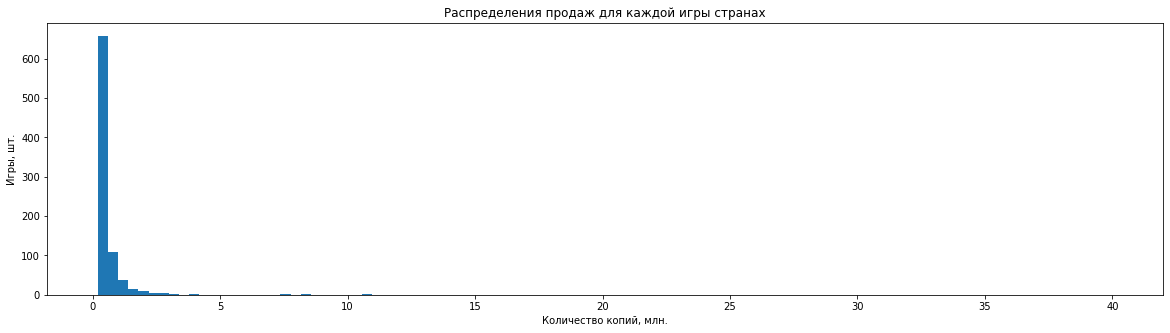

In [18]:
#определим общую информацию
print('Общая информация о параметре:')
print(data['Other_sales'].describe(), '\n')

#определим количество нулевых значений
print('Количество нулевых значений:')
print(data['Other_sales'].isna().sum(), '\n')

#определим количество каждого уникального значения
print('Частота уникальных значений в популяции:')
print(data['Other_sales'].value_counts())

#Построим график для параметра:
data['Other_sales'].plot(kind = 'hist', figsize = (20,5), bins = 100, range = (0.2, 40))
plt.title('Распределения продаж для каждой игры странах')
plt.xlabel("Количество копий, млн.")
plt.ylabel("Игры, шт.")

**Вывод по параметру:** Other_sales — продажи в других странах (миллионы проданных копий)

Данный параметр указывает какое количество игр (млн. копий) было продано в других странах. На основе первичного анализа можно сделать вывод:
- нулевые значения отсутствуют;
- в среднем было продано 47342 копий игр.
- минимальное значение продаж - 0, максимальное - 10 млн.
- согласно графику, большая часть игр (2/5 всей популяции) в других странах имели спрос менее 0.1 млн. копий.

**Рекомендации для предобработки:**
Аналогично предыдущему параметру.

#### `Critic_Score` — оценка критиков (максимум 100)

Рассмотрим основные данные по данному параметру, построим график, а также сформируем рекомендации по предобработке данного параметра.

Общая информация о параметре:
count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: Critic_Score, dtype: float64 

Количество нулевых значений:
8578 

Перечень уникальных значений:
[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.] 

Количество уникальных значений:
83 

Частота уникальных значений в популяции:
70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
29.0      3
13.0      1
22.0      1
17.0      1
21.0      1
Name: Critic_Score, Length: 82, dtype: int64


Text(0, 0.5, 'Игры, шт.')

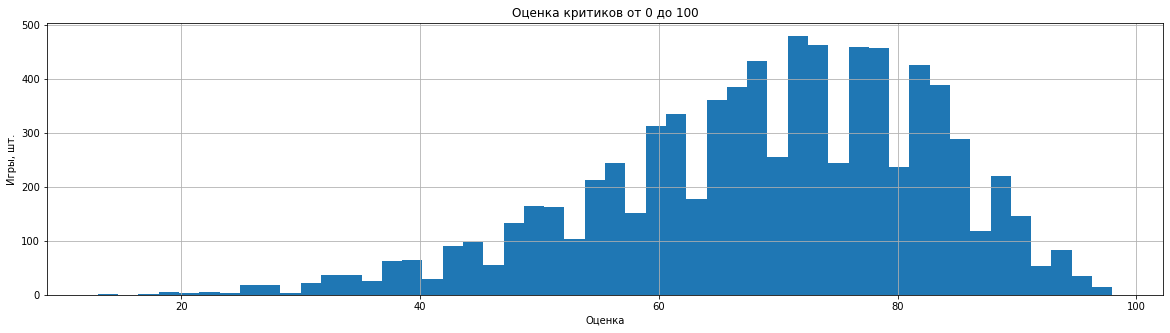

In [19]:
#определим общую информацию
print('Общая информация о параметре:')
print(data['Critic_Score'].describe(), '\n')

#определим количество нулевых значений
print('Количество нулевых значений:')
print(data['Critic_Score'].isna().sum(), '\n')

#определим перечень уникальных значений и посчитаем их количество
print('Перечень уникальных значений:')
print(data['Critic_Score'].unique(), '\n')

print('Количество уникальных значений:')
print(len(data['Critic_Score'].unique()), '\n')


#определим количество каждого уникального значения
print('Частота уникальных значений в популяции:')
print(data['Critic_Score'].value_counts())

#Построим график для параметра:
data['Critic_Score'].hist(figsize = (20,5), bins = 50)
plt.title('Оценка критиков от 0 до 100')
plt.xlabel("Оценка")
plt.ylabel("Игры, шт.")

In [20]:
#Рассмотрим 10 игр без рейтинга
data[data['Critic_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Вывод по параметру:** Critic_Score — оценка критиков (максимум 100)

Данный параметр указывает как оценили критики игры от 0 до 100. На основе первичного анализа можно сделать вывод:
- в популяции большое количество 0 значений - 8579;
- в среднем оценка критиков составляет 68.9 баллов.
- минимальное значение - 1, максимальное - 98.
- согласно графику, большая часть игр имеющих оценку Критиков имеют оценку в диапазоне от 60 до 85.

**Рекомендации для предобработки:**
После добавление столбца с общими продажами необходимо проанализировать игры, у которых отсутствует рейтинг, если рейтинг отсутсвует у игр с низким колличеством продаж - это нормальная закономерность. Такие позиции необходимо будет удалить.


#### `User_Score` — оценка пользователей (максимум 10)

Рассмотрим основные данные по данному параметру, построим график, а также сформируем рекомендации по предобработке данного параметра.

Общая информация о параметре:
count     10014
unique       96
top         tbd
freq       2424
Name: User_Score, dtype: object 

Количество нулевых значений:
6701 

Перечень уникальных значений:
['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7'] 

Количество уникальных значений:
97 

Частота уникальных значений в популяции:
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
2.3       2
0.2       2
0.9       2
9.7       1
0         1
Name: User_Score, Length:

Text(0, 0.5, 'Игры, шт.')

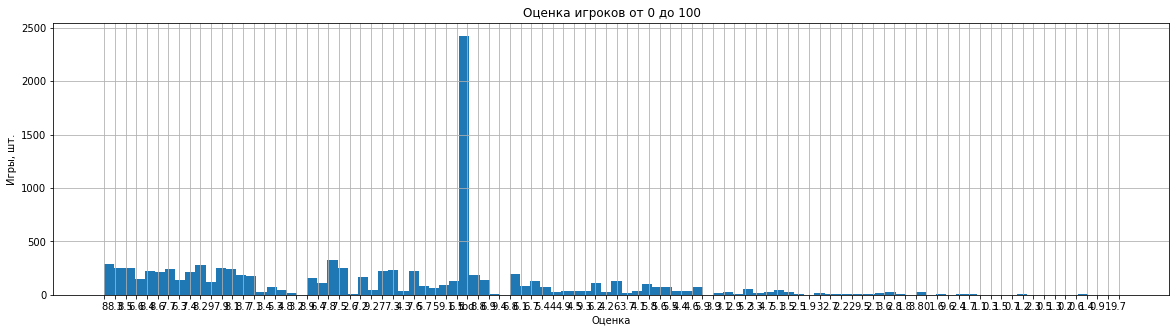

In [21]:
#определим общую информацию
print('Общая информация о параметре:')
print(data['User_Score'].describe(), '\n')

#определим количество нулевых значений
print('Количество нулевых значений:')
print(data['User_Score'].isna().sum(), '\n')

#определим перечень уникальных значений и посчитаем их количество
print('Перечень уникальных значений:')
print(data['User_Score'].unique(), '\n')

print('Количество уникальных значений:')
print(len(data['User_Score'].unique()), '\n')


#определим количество каждого уникального значения
print('Частота уникальных значений в популяции:')
print(data['User_Score'].value_counts())

#Построим график для параметра:
data['User_Score'].hist(figsize = (20,5), bins = 100)
plt.title('Оценка игроков от 0 до 100')
plt.xlabel("Оценка")
plt.ylabel("Игры, шт.")

**Вывод по параметру:** User_Score — оценка игроков (максимум 10)

Данный параметр указывает как оценили игроки игры от 0 до 10. На основе первичного анализа можно сделать вывод:
- в популяции большое количество 0 значений - 6701;
- больше всего игроки ставили значения "tbd"

**Рекомендации для предобработки:**
1. Необходимо преобразовать значение **"tbd"** - присвоить ему числовой рейтинг
2. Изменить формат с `object` на `float64`

#### `Rating` — рейтинг от организации ESRB

Рассмотрим основные данные по данному параметру, построим график, а также сформируем рекомендации по предобработке данного параметра.

Общая информация о параметре:
count     9949
unique       8
top          E
freq      3990
Name: Rating, dtype: object 

Количество нулевых значений:
6766 

Перечень уникальных значений:
['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP'] 

Количество уникальных значений:
9 

Частота уникальных значений в популяции:
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64


Text(0, 0.5, 'Игры, шт.')

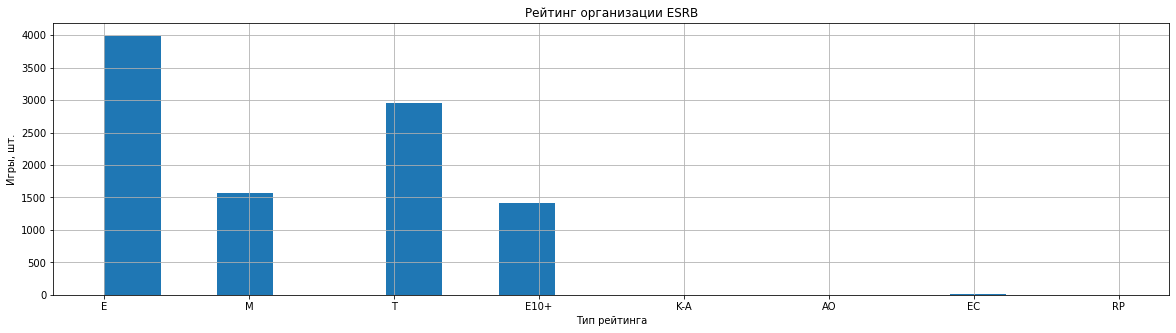

In [22]:
#определим общую информацию
print('Общая информация о параметре:')
print(data['Rating'].describe(), '\n')

#определим количество нулевых значений
print('Количество нулевых значений:')
print(data['Rating'].isna().sum(), '\n')

#определим перечень уникальных значений и посчитаем их количество
print('Перечень уникальных значений:')
print(data['Rating'].unique(), '\n')

print('Количество уникальных значений:')
print(len(data['Rating'].unique()), '\n')


#определим количество каждого уникального значения
print('Частота уникальных значений в популяции:')
print(data['Rating'].value_counts())

#Построим график для параметра:
data['Rating'].hist(figsize = (20,5), bins = 18)
plt.title('Рейтинг организации ESRB')
plt.xlabel("Тип рейтинга")
plt.ylabel("Игры, шт.")

**Вывод по параметру:** Rating — рейтинг от организации ESRB¶

Данный параметр указывает рейтинг, присвоенный организацией ESRB. На основе первичного анализа можно сделать вывод:
- в популяции большое количество 0 значений - 6766;
- общее количество уникальных значений  - 9 (8 + Nan);
- больше всего игр имеет рейтинг "E", "Т", "М", "Е10+", другие рейтинги были присвоены 15 играм.

**Рекомендации для предобработки:**
1. Необходимо добавить столбец с расшифровкой рейтинга - для лучшего понимания значений.

### Вывод по блоку "Анализ данных"

После детального просмотра данных, можно сделать вывод о следующих необходимых шагах:
- Для всего датафрейма изменить название столбцов - перевести их в строчный формат.

**Name — название игры**
- удалить пустые значения

**Year_of_Release — год выпуска**
- заполнить года средними значениями в зависимости от платформы

**NA_sales, EU_sales, JP_sales, Other_sales**
- добавить столбец с общим количеством продаж по миру - `total_sales`.

**User_Score — оценка пользователей (максимум 10)**
- заменить значение tbd;
- изменить тип данных параметра на float64.

**Rating — рейтинг от организации ESRB**
- добавить параметр `rating_describtion` и добавить описание рейтингов

Также необходимо проанализировать:
- на основе параметра `total_sales` необходимо проанализировать свяpь отсутствия рейтинга и продаж.

## Предобработка данных

В рамках блока по анализу данных был сформирован план по предобработке данных.

В первую очередь для удобной работы необходимо привести название параметров к строчному типу. 

In [23]:
#применим функцию map для приведения названия колонок к нижнему регистру
data.columns = data.columns.str.lower()

#выведем результат на экран
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### `name` — название игры

согласно плану необходимо:
- удалить пустые значения


In [24]:
#удаляем пустые значения методом dropna
data = data.dropna(subset = ['name'])

#убедимся, что пустые значение отсутствуют
print('Количество пустых значений:')
data['name'].isna().sum()

Количество пустых значений:


0

### `year_of_release` — год выпуска

- заполнить года средними значениями в зависимости от платформы.

In [25]:
#Методом transorm добавим параметр с медианным значением года по платформам
data ['year_of_release_median'] = data.groupby('platform')['year_of_release'].transform('median')

#Заполним медианным значеним пустые строки в параметре year_of_release
data ['year_of_release'] = data ['year_of_release'].fillna(data['year_of_release_median'])

#Удалим параметр с медианным значением
data = data.drop(columns = ['year_of_release_median'])

#убедимся, что пустые значение отсутствуют
print('Количество пустых значений:')
data['year_of_release'].isna().sum()

Количество пустых значений:


/tmp/ipykernel_139/3772598580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data ['year_of_release_median'] = data.groupby('platform')['year_of_release'].transform('median')
/tmp/ipykernel_139/3772598580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data ['year_of_release'] = data ['year_of_release'].fillna(data['year_of_release_median'])


0

### `na_sales`, `eu_sales`, `jp_sales`, `other_sales`

- добавить столбец с общим количеством продаж по миру - `total_sales`.

In [26]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


### `user_score` — оценка пользователей (максимум 10)

- заменить значение tbd;
- изменить тип данных параметра на float64.


Согласно информации из открытых источников термин **tbd** (от англ. to be determined - будет определено позднее) - означает ситуацию, когда информация будет определена спустя какой-то срок. Таким образом можно предположить, что **tbd** в контесте рейтинга означет, что пользователи приступили к игре и свое мнение выскажут чуть позже.

Рассмотрим данные с этим значением более внимательно.

In [27]:
data.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E,6.70
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+,3.97
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T,2.81
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E,2.42
657,Frogger's Adventures: Temple of the Frog,GBA,2003.0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E,2.40
...,...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E,0.01
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E,0.01
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E,0.01
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E,0.01


Из среза до конца не явна зависимость между `user_score` = tbd и другими параметрами.
Однако, так как данный термин подразумевает отсутствие оценки - для таких данных необходимо будет присвоить значение "Nan".

In [28]:
#с помощью функции np.nan из  библиотеки NumPy заменим все значение 'tbd' на пропуски
data['user_score'].replace('tbd',np.nan,inplace=True)


#переведем параметр в формат "float64"
data['user_score'] = data['user_score'].astype('float')


### `rating`— рейтинг от организации ESRB
- добавить параметр `rating_describtion` и добавить описание рейтингов

из откртых источников мы получили следующее описание
- E(«Everyone») — «Для всех» Содержание вполне подходит для всех возрастов, первоначальное обозначение рейтинга **"К-А"**
- T(«Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. 
- M(«Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет.
- E10+(«Everyone 10 and older») — «Для всех от 10 лет и старше»
- EC («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет
- K-A - бывшее обозначение "E"
- RP («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.
- AO («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет.

На основе этих данных необходимо сделать следующее:
- заменить устаревший рейтинг **"K-A"** на **"E"**
- пустые значения заполним NR - No Rating - рейстинг отсутствует
- добавить столбец `rating_describtion` - для краткого описания рейтинга (с информативной целью)

In [29]:
#Заменим К-А на Е
data['rating'] = data['rating'].replace({'K-A':'E'})

#убедимся, что изменения были приняты
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [30]:
#заменим пустые значения на "NR"
data['rating'] = data['rating'].fillna('NR') 

#убедимся, что пустые значения отсутствуют
print('Количество пустых значений равно:')
data['rating'].isna().sum()

Количество пустых значений равно:


0

In [31]:
#создадим новый датафрейм и присвоим рейтингу соответствующее описание
rating_describtion = pd.DataFrame({'rating':['E','M','T', 'E10+', 'AO', 'EC', 'RP','NR'],
                                   'rating_describtion':['Everyone','Mature','Teen', 'Everyone 10 and older', 'Adults Only 18+', 'Early childhood', 'Rating Pending','No Rating']})

#объединим основной датафрейм с новым
data = pd.merge(data,rating_describtion, how = 'left')
data


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,rating_describtion
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,Everyone
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NR,40.24,No Rating
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,Everyone
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,Everyone
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NR,31.38,No Rating
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NR,0.01,No Rating
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NR,0.01,No Rating
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NR,0.01,No Rating
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NR,0.01,No Rating


**Вывод**

Таким образом все запланированные процедуры по предобработке данных были выполнены.

## Исследование данных

На основе предобработанных данных необходимо провести новый анализ, а также провести исследования данных

In [32]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,rating_describtion
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,Everyone
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NR,40.24,No Rating
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,Everyone
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,Everyone
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NR,31.38,No Rating
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NR,0.01,No Rating
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NR,0.01,No Rating
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NR,0.01,No Rating
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NR,0.01,No Rating


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16712
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                16713 non-null  object 
 1   platform            16713 non-null  object 
 2   year_of_release     16713 non-null  float64
 3   genre               16713 non-null  object 
 4   na_sales            16713 non-null  float64
 5   eu_sales            16713 non-null  float64
 6   jp_sales            16713 non-null  float64
 7   other_sales         16713 non-null  float64
 8   critic_score        8137 non-null   float64
 9   user_score          7590 non-null   float64
 10  rating              16713 non-null  object 
 11  total_sales         16713 non-null  float64
 12  rating_describtion  16713 non-null  object 
dtypes: float64(8), object(5)
memory usage: 1.8+ MB


После всех преобразований мы имеем следующую информацию по исследуемым данным:
- общее количество строк в датафрейме составляет 16712;
- пустые значения присутствуют только в параметрах связанных с рейтингом.

### Проведение исследовательского анализа данных

В рамках данного блока будет проведены исследования в отношении предобработанного датафрейма.

**Список исследований:**
- анализ зависимости между играми без рейтинга и другими параметрами - определить, связано ли отсутствие рейтинга с каким(и)-то другими параметрами.
- анализ выхода игр в зависимости от года - необходимо изучить сколько игр выпускалось в разные годы, определить Важны ли данные за все периоды?
- анализ зависимости продаж от вида платформы - необходимо изучить, как менялись продажи по платформам. Отобрать платформы с наибольшими суммарными продажами и построить распределение по годам. определить за какой характерный срок появляются новые и исчезают старые платформы?
- отбор актуального периода для построения прогноза - необходимо изучить данные за соответствующий актуальный период. Определить актуальный период на основе исследования предыдущих вопросов. 

Далее необходимо провести исследования на базе выбранного актуального периода:
- анализ наиболее популярных платформ - определить, какие платформы лидируют по продажам, растут или падают? Выбирать несколько потенциально прибыльных платформ.

- анализ глобальных продаж - необходимо построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать полученный результат.

- анализ влияния рейтинга для наиболее популярной платформы - необходимо изучить, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеивания и посчитайте корреляцию между отзывами и продажами. Сформировать выводы.

- анализ продаж игр на других популярных платформах - полученные в предыдущем шаге выводы соотнести с продажами игр на других платформах.

- анализ распределения игр в зависимости от жанра - изучить общее распределение игр по жанрам. Рассмотреть, что можно сказать о самых прибыльных жанрах? Определить выделяются ли жанры с высокими и низкими продажами?

#### Анализ зависимости между играми без рейтинга и другими параметрами

Внимательно изучим данные, в которых пропущен рейтинг по всем трем параметрам: `critic_score`, `user_score`, `rating`
и попытаемся выявить взаимосвязь с другими параметрами.

In [34]:
#сделаем срез и посмотрим распределение по годам
data.query('(critic_score.isna())&(user_score.isna())&(rating.isna())')['year_of_release'].value_counts()

Series([], Name: year_of_release, dtype: int64)

In [35]:
#сделаем срез и посмотрим распределение по продажам
data.query('(critic_score.isna())&(user_score.isna())&(rating.isna())')['total_sales'].value_counts()

Series([], Name: total_sales, dtype: int64)

In [36]:
#сделаем срез и посмотрим распределение по платформам
data.query('(critic_score.isna())&(user_score.isna())&(rating.isna())')['platform'].value_counts()

Series([], Name: platform, dtype: int64)

**Вывод по пункту 3.1.1:**

Из проведенного анализа видно:
- отсутствие рейтингов присутствуют во всех годах;
- рейтинг отсутствует как у игр с малым, так и с большим числом продаж;
- игры без рейтинга присутствуют на всех платформах

Таким образом нельзя однозначно сказать, что отсутствие рейтинга у игр взаимосвязано с другими параметрами.

#### Анализ выхода игр в зависимости от года 
Необходимо изучить сколько игр выпускалось в разные годы, определить Важны ли данные за все периоды?

Количество выпущенных игр за год:
    year_of_release  name
36           2016.0   502
35           2015.0   606
34           2014.0   582
33           2013.0   552
32           2012.0   653
31           2011.0  1161
30           2010.0  1302
29           2009.0  1476
28           2008.0  1457
27           2007.0  1197
26           2006.0  1006
25           2005.0   973
24           2004.0   783
23           2003.0   800
22           2002.0   829
21           2001.0   482
20           2000.0   350
19           1999.0   341
18           1998.0   386
17           1997.0   290
16           1996.0   263
15           1995.0   219
14           1994.0   121
13           1993.0    60
12           1992.0    43
11           1991.0    41
10           1990.0    16
9            1989.0    17
8            1988.0    15
7            1987.0    16
6            1986.0    21
5            1985.0    14
4            1984.0    14
3            1983.0    17
2            1982.0    53
1            1981.0    46
0   

Text(0, 0.5, 'Игры, шт.')

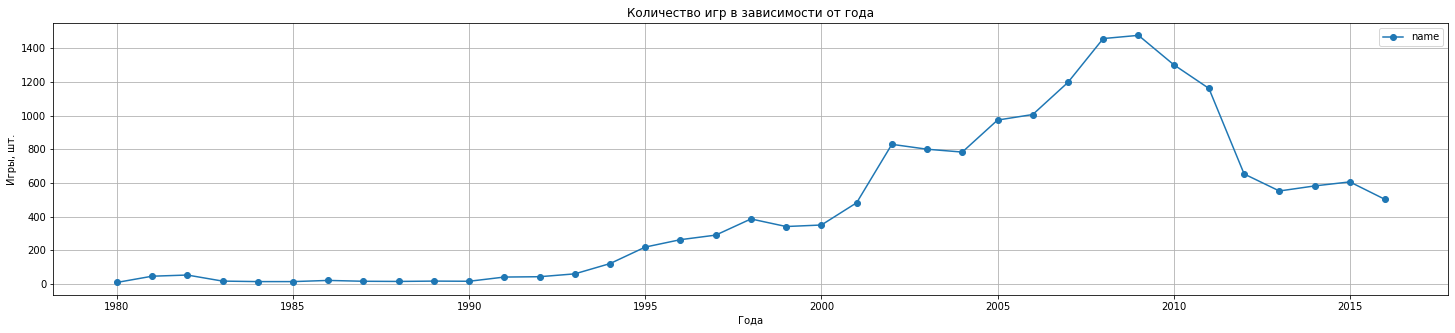

In [37]:
#определим количество выпущенных игр в зависимости от года
print('Количество выпущенных игр за год:')
print((data.pivot_table(index = 'year_of_release', values = 'name',aggfunc= 'count')
 .reset_index()
 .sort_values('year_of_release', ascending = False)))

#построим график
(data.pivot_table(index = 'year_of_release', values = 'name',aggfunc= 'count')
 .plot(style ='o-', figsize = (25,5), grid = True))

plt.xticks(rotation=0)
plt.title('Количество игр в зависимости от года')
plt.xlabel("Года")
plt.ylabel("Игры, шт.")

**Вывод по пункту 3.1.2:**

Согласно полученным данным, видно, что до 1994 года выпускалось не более **100** игр в год.

В промежуток с 1994 по 2005 г. игровая индустрия набирала разгон.

Далее с 2006 по 2011 было время когда игры выходили в большом количестве - не менее **1000** игр в год.

А начиная с 2012 по 2016 г. происходит спад в производстве игр (возможно связано с тем, что к играм выдвигались более высокие требование и на их разработку стало уходить больше времени) - в эти годы в среднем выходило от **500** до **650** игр в год.

Таким образом, можно выделить два периода, анализ по которым наиболее интересен:
- с 2006 по 2011 - пик выхода игр (наибольшее количество).
- с 2012 по 2016 - текущий период (наиболее актуальные игры)

#### Анализ зависимости продаж от вида платформы 
Необходимо изучить, как менялись продажи по платформам. Отобрать платформы с наибольшими суммарными продажами и построить распределение по годам. определить за какой характерный срок появляются новые и исчезают старые платформы?


In [38]:
#определим, на каких платформах были наибольшие продажи за весь период и топ-10 сохраним в переменную `top_sales_by_platform`
top_sales_by_platform = (data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')
 .reset_index()
 .sort_values('total_sales', ascending = False)
 .head(10))

#выведем значение переменной на экран
print(top_sales_by_platform, '\n' )

#преобразуем данные с названием топ-10 платформ в список и выведем на экран
top_sales_by_platform = list(top_sales_by_platform['platform'])
print ('Список топ-10 платформ:')
print (top_sales_by_platform)

   platform  total_sales
16      PS2      1255.77
28     X360       971.42
17      PS3       939.65
26      Wii       907.51
4        DS       806.12
15       PS       730.86
6       GBA       317.85
18      PS4       314.14
19      PSP       294.05
13       PC       259.52 

Список топ-10 платформ:
['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']


Text(0, 0.5, 'Платформы')

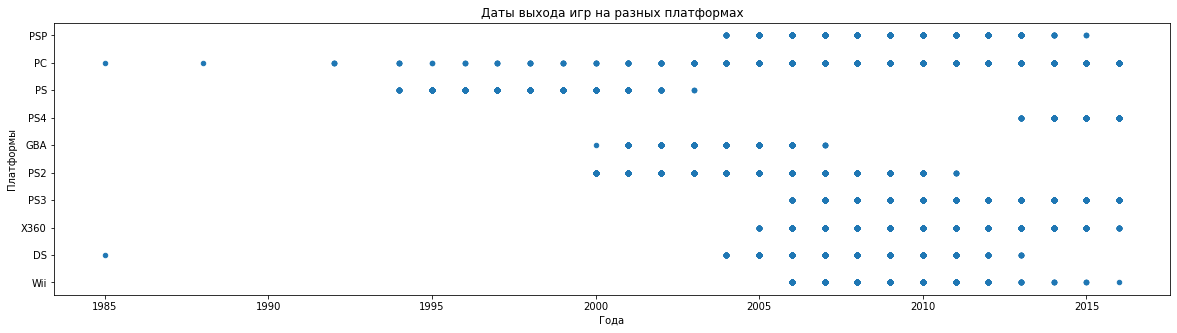

In [39]:
#Для построения графика необходимо сделать срез на основе списка топ-10 платформ и на основе среза построить график
(data[data['platform'].isin(top_sales_by_platform)]
 .plot(kind = 'scatter', x = 'year_of_release', y = 'platform', figsize = (20,5)))

plt.title('Даты выхода игр на разных платформах')
plt.xlabel("Года")
plt.ylabel("Платформы")

In [40]:
#рассмотрим аномальное значение по платформе DS - за 1985 г.
data.query('year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,rating_describtion
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NR,40.24,No Rating
374,Kung Fu,NES,1985.0,Action,1.64,0.38,1.42,0.06,NaN,NaN,NR,3.50,No Rating
868,Soccer,NES,1985.0,Sports,0.18,0.23,1.53,0.02,NaN,NaN,NR,1.96,No Rating
1261,Ice Climber,NES,1985.0,Platform,0.46,0.10,0.92,0.02,NaN,NaN,NR,1.50,No Rating
1481,Gyromite,NES,1985.0,Puzzle,0.73,0.16,0.40,0.03,NaN,NaN,NR,1.32,No Rating
1970,Tag Team Match M.U.S.C.L.E.,NES,1985.0,Fighting,0.00,0.00,1.05,0.00,NaN,NaN,NR,1.05,No Rating
2010,Bomberman,NES,1985.0,Puzzle,0.18,0.00,0.85,0.00,NaN,NaN,NR,1.03,No Rating
2061,1942,NES,1985.0,Shooter,0.65,0.14,0.21,0.00,NaN,NaN,NR,1.00,No Rating
2251,Balloon Fight,NES,1985.0,Platform,0.39,0.09,0.43,0.01,NaN,NaN,NR,0.92,No Rating
3903,Wrecking Crew,NES,1985.0,Platform,0.00,0.00,0.51,0.00,NaN,NaN,NR,0.51,No Rating


**Вывод по пункту 3.1.3:**

В рамках данного исследование были изучены топ-10 платформ с самыми высокими продажами. Был построен график на котором отображено в какие периоды выходили игры на данные платформы.

Согласно полученному графику видно, что средний срок актуальности платформы составляет:
- для консолей 9-12 лет, при этом на примере линейки консолей PlayStation можно увидеть, что новая консоль выходит каждые 7-8 лет, при этом какое-то время новые игры выходят как на старую так и на новую модель консолей PlayStation
- для персонального компьютера игры выходят постоянно начиная с 1985 года (согласно анализируемым данным).

Также стоит отметить, что в данных имеется отклонение - по платформе DS есть игра 1985 г., при это сама платформа вышла в 2004 году - данное значение является отклонением и не учитывается при составлении общего понимания о популяции.

#### Отбор актуального периода для построения прогноза 
Необходимо изучить данные за соответствующий актуальный период. Определить актуальный период на основе исследования предыдущих вопросов.

В качестве актуального периода был выбран период с 2014 по 2016 г. - это связано с тем, что:
- согласно пункту 3.1.2, это последний период с самыми новыми и актуальными играми? при этом, игровая индустрия достаточно быстро развивается по этому лучше взять последние 3 года (2014,2015,2016 гг.);
- согласно пункту 3.1.3, данный период захватывает как новые платформы, так и небольшой срок функционирования предыдущих платформ консолей (PS3, X360);
- в целом популярностью у игроков пользуются новые игры, на них необходимо будет сделать основной упор.

In [41]:
#создадим переменную `actual_data` в которую сохраним значение игр выходящих с 2014 года
actual_data = data.query('year_of_release >= 2014')

#выведем на экран информацию о датасете
actual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 31 to 16712
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                1690 non-null   object 
 1   platform            1690 non-null   object 
 2   year_of_release     1690 non-null   float64
 3   genre               1690 non-null   object 
 4   na_sales            1690 non-null   float64
 5   eu_sales            1690 non-null   float64
 6   jp_sales            1690 non-null   float64
 7   other_sales         1690 non-null   float64
 8   critic_score        719 non-null    float64
 9   user_score          889 non-null    float64
 10  rating              1690 non-null   object 
 11  total_sales         1690 non-null   float64
 12  rating_describtion  1690 non-null   object 
dtypes: float64(8), object(5)
memory usage: 184.8+ KB


**Вывод по пункту 3.1.4:**

К актуальному периоды были отнесены игры выходившие с 2014 г. по последний доступный в данных год. Общее количество данных в популяции составляет 1690 строк.

#### Анализ наиболее популярных платформ 
Определить, какие платформы лидируют по продажам, растут или падают? Выбирать несколько потенциально прибыльных платформ.

  platform  total_sales
3      PS4       288.15
9     XOne       140.36
0      3DS        86.68
2      PS3        68.18
8     X360        48.22
7     WiiU        42.98
1       PC        27.05
5      PSV        22.66
6      Wii         5.07
4      PSP         0.36
AxesSubplot(0.125,0.125;0.775x0.755)


Text(0, 0.5, 'Количество продаж в мире')

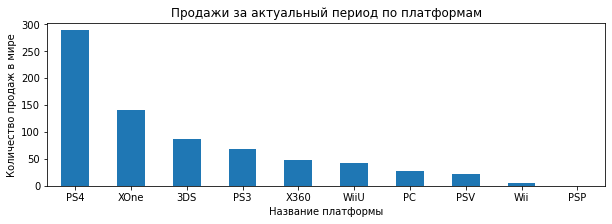

In [42]:
#определим количество продаж для актуального периода по платформам
print((actual_data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')
      .reset_index()
      .sort_values('total_sales', ascending = False)))


# построим график продаж по платформам для актуального периода 
print((actual_data.groupby('platform')['total_sales'].sum()
      .sort_values(ascending = False)
      .plot(kind = 'bar', figsize = (10,3))))

plt.xticks(rotation=0)
plt.title ('Продажи за актуальный период по платформам')
plt.xlabel ('Название платформы')
plt.ylabel ('Количество продаж в мире')

**Вывод по пункту 3.1.5:**

Согласно проведенному анализу, наибольшей популярностью пользуются актуальное 3 типа консолей:
- PlayStation (PS3, PS4)
- XBox (X360, XOne) 
- Nintendo (3DS, WiiU)

При этом можно отметить, что популярность линейки PlayStation растет, а Nintendo снижается.

#### Анализ глобальных продаж 
Необходимо построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать полученный результат.


Text(0.5, 6.799999999999965, 'Платформы')

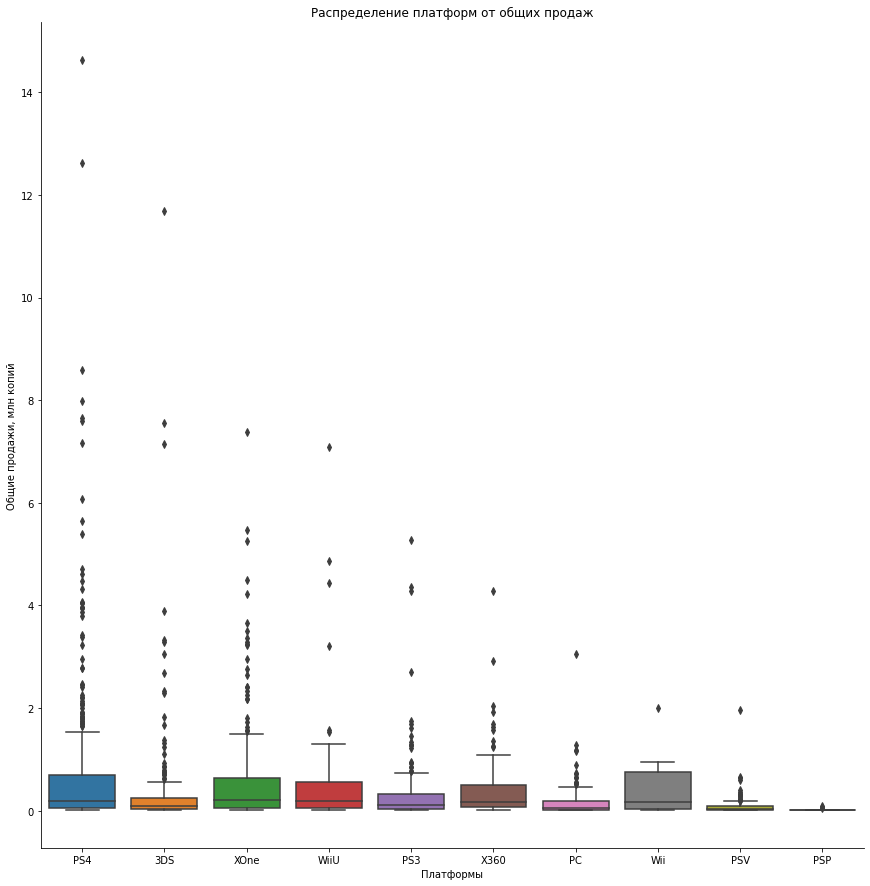

In [43]:
#Построим диаграмму размаха методом boxplot
sns.catplot(kind = 'box', x = 'platform', y='total_sales', data = actual_data, height = 12)


plt.title ('Распределение платформ от общих продаж')
plt.ylabel ('Общие продажи, млн копий')
plt.xlabel ('Платформы')

**Вывод по пункту 3.1.6:**

Из графика видно, что:
- в целом основные продажи копий игр в зависимости от платформ находятся в промежутке от 0 до 1 млн копий за игру.
- больше всего выбросов имеют наиболее свежие платформы - PS4, 3DS, XOne. Это значит что на данных платформах есть игры продажи копий которых сильно превышают среднестатистические продажи.

#### Анализ влияния рейтинга для наиболее популярной платформы 
Необходимо изучить, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеивания и посчитайте корреляцию между отзывами и продажами. Сформировать выводы.

Для анализа выберем платформу с самым большим количеством проданных копий в актуальном периоде - PS4

In [44]:
#создадим список с необходимыми для анализа параметрами
list_analysis = ['platform', 'critic_score','user_score','total_sales','rating','rating_describtion']

#извлечем анализируемые параметры в отдельный датафрейм
actual_data_analysis = actual_data[list_analysis]

#сделаем срез по платформе - PS4 и применим метод .corr и выведем результат зависимости 
actual_data_analysis.query ('platform =="PS4"').corr().tail(1)

,critic_score,user_score,total_sales
total_sales,0.402661,-0.040132,1.0


Text(0, 0.5, 'Продажи, млн копий')

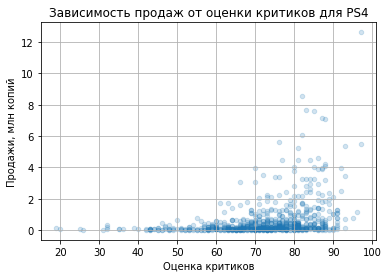

In [45]:
#построим диаграммы рассеивания 
#зависимость продаж и оценки критиков

actual_data_analysis.plot(kind ='scatter', x='critic_score', y='total_sales', alpha = 0.2, grid = True)

plt.title ('Зависимость продаж от оценки критиков для PS4')
plt.xlabel ('Оценка критиков')
plt.ylabel ('Продажи, млн копий')

Text(0, 0.5, 'Продажи, млн копий')

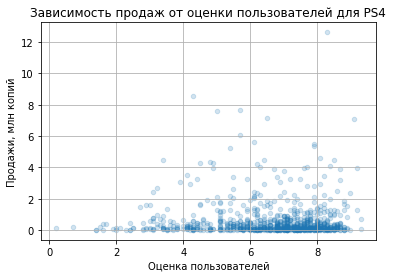

In [46]:
#зависимость продаж и оценки пользователей

actual_data_analysis.plot(kind ='scatter', x='user_score', y='total_sales', alpha = 0.2, grid = True)

plt.title ('Зависимость продаж от оценки пользователей для PS4')
plt.xlabel ('Оценка пользователей')
plt.ylabel ('Продажи, млн копий')

Text(0, 0.5, 'Продажи, млн копий')

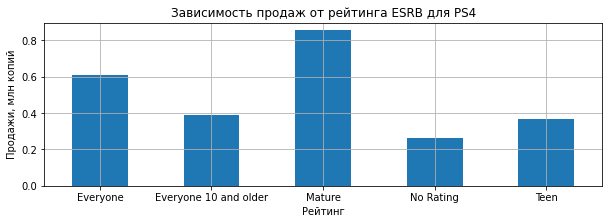

In [47]:
#зависимость продаж и оценки ESRB

(actual_data_analysis.groupby('rating_describtion')['total_sales'].mean()
 .plot(kind ='bar', x='rating_describtion', y='total_sales', grid = True, figsize = (10,3)))

plt.xticks(rotation = 0)
plt.title ('Зависимость продаж от рейтинга ESRB для PS4')
plt.xlabel ('Рейтинг')
plt.ylabel ('Продажи, млн копий')

In [48]:
#рассмотрим распределение игр по рейтингам
actual_data_analysis['rating_describtion'].value_counts()

No Rating                749
Teen                     272
Mature                   265
Everyone                 219
Everyone 10 and older    185
Name: rating_describtion, dtype: int64

**Вывод по пункту 3.1.7:**
Согласно проведенному анализу было установлено:

1. На количество продаж сильнее всего влияет параметр `critics_score` - оценка критиков (устойчивая прямая взаимосвязь - 0.4), таким образом чем выше оценка критиков, тем больше было приобретено копий.
2. Параметр `user_score` - оценка пользователей показывает слабую обратную взаимосвязь, однако по графику рассеивания мы видим, что связь прямая - чем выше оценка пользователей, тем больше было продано копий игры.
3. Согласно анализу зависимости продаж и параметр `rating` - рейтинг ESRB, видно что больше всего продаж приходится на сегмент M(«Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Это обосновано тем, что чаще всего игры могут себе позволить взрослые люди, и как правило они покупают их для собственного пользования

#### Анализ продаж игр на других популярных платформах 
Полученные в предыдущем шаге выводы соотнести с продажами игр на других платформах.


In [49]:
#сформируем pivot с указанием количества оценок по платформам и отфильтруем по самому популярному рейтингу.
(actual_data.pivot_table(index = 'platform', columns = 'rating_describtion', values = 'rating', aggfunc = 'count')
.sort_values('Mature',ascending = False))

rating_describtion,Everyone,Everyone 10 and older,Mature,No Rating,Teen
platform,,,,,
PS4,49.0,34.0,72.0,136.0,85.0
XOne,38.0,27.0,65.0,59.0,39.0
PC,24.0,11.0,50.0,41.0,25.0
PS3,27.0,21.0,27.0,106.0,38.0
X360,26.0,22.0,26.0,20.0,17.0
PSV,7.0,12.0,18.0,214.0,45.0
WiiU,18.0,23.0,4.0,20.0,8.0
3DS,26.0,30.0,3.0,138.0,15.0
PSP,NaN,NaN,NaN,13.0,NaN


In [50]:
#сформируем pivot с указанием медианного значения оценок игр по платформам
(actual_data.pivot_table(index = 'platform',  values = ['user_score','critic_score'], aggfunc = 'median')
 .sort_values ('user_score',ascending = False))

,critic_score,user_score
platform,,
PSV,72.0,7.80
3DS,69.0,7.40
PS4,73.0,7.10
WiiU,73.0,7.10
PC,77.0,6.80
XOne,76.0,6.80
PS3,67.0,6.55
Wii,NaN,6.35
X360,67.0,6.00


Text(0, 0.5, 'Продажи, млн копий')

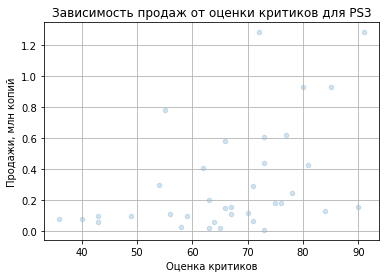

In [51]:
#построим график рассеивания для PS3
actual_data.query ('platform =="PS3"').plot(kind ='scatter', x='critic_score', y='total_sales', alpha = 0.2, grid = True)

plt.title ('Зависимость продаж от оценки критиков для PS3')
plt.xlabel ('Оценка критиков')
plt.ylabel ('Продажи, млн копий')

Text(0, 0.5, 'Продажи, млн копий')

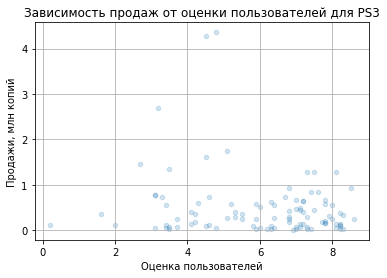

In [52]:
#построим график рассеивания для PS3
actual_data.query ('platform =="PS3"').plot(kind ='scatter', x='user_score', y='total_sales', alpha = 0.2, grid = True)

plt.title ('Зависимость продаж от оценки пользователей для PS3')
plt.xlabel ('Оценка пользователей')
plt.ylabel ('Продажи, млн копий')

Text(0, 0.5, 'Продажи, млн копий')

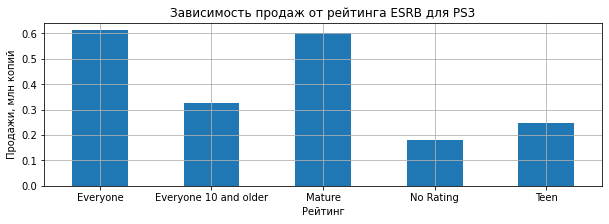

In [53]:
#зависимость продаж и оценки ESRB для PS3

(actual_data.query ('platform =="PS3"').groupby('rating_describtion')['total_sales'].mean()
 .plot(kind ='bar', x='rating_describtion', y='total_sales', grid = True, figsize = (10,3)))

plt.xticks(rotation = 0)
plt.title ('Зависимость продаж от рейтинга ESRB для PS3')
plt.xlabel ('Рейтинг')
plt.ylabel ('Продажи, млн копий')

Text(0, 0.5, 'Продажи, млн копий')

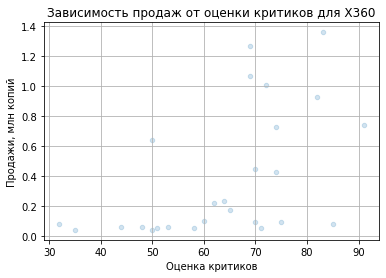

In [54]:
#построим график рассеивания для X360
actual_data.query ('platform =="X360"').plot(kind ='scatter', x='critic_score', y='total_sales', alpha = 0.2, grid = True)

plt.title ('Зависимость продаж от оценки критиков для X360')
plt.xlabel ('Оценка критиков')
plt.ylabel ('Продажи, млн копий')

Text(0, 0.5, 'Продажи, млн копий')

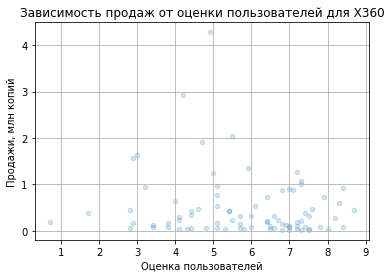

In [55]:
#построим график рассеивания для X360
actual_data.query ('platform =="X360"').plot(kind ='scatter', x='user_score', y='total_sales', alpha = 0.2, grid = True)

plt.title ('Зависимость продаж от оценки пользователей для X360')
plt.xlabel ('Оценка пользователей')
plt.ylabel ('Продажи, млн копий')

Text(0, 0.5, 'Продажи, млн копий')

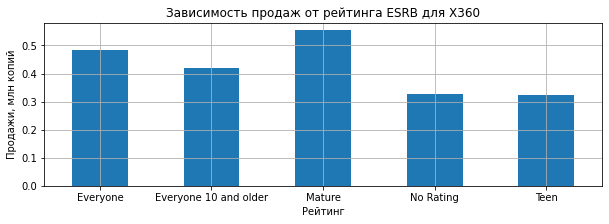

In [56]:
#зависимость продаж и оценки ESRB для X360

(actual_data.query ('platform =="X360"').groupby('rating_describtion')['total_sales'].mean()
 .plot(kind ='bar', x='rating_describtion', y='total_sales', grid = True, figsize = (10,3)))

plt.xticks(rotation = 0)
plt.title ('Зависимость продаж от рейтинга ESRB для X360')
plt.xlabel ('Рейтинг')
plt.ylabel ('Продажи, млн копий')

**Вывод по пункту 3.1.8:**

В рамках данного исследования были проанализированы все актуальные платформы на предмет зависимости значений рейтинга и количества продаж, также для PS3 и X360 - так как они входят в топ-3 были построены графики рассеивания для понимания распределения.

1. Если говорить о рейтинге ESRB - то действительно, видно, что у платформ, игры которых получали рейтинг **M(«Mature»)** чаще - более высокие продажи. 
2. В отношении рейтинга критиков все не так однозначно, данные полученные по средним оценкам по каждой платформе не отражают действительности по продажам - все оценки примерно находятся на одном уровне, однако при детальном рассмотрении каждой платформы видно (согласно графику) что продаж игр больше с более высокими оценками критиков и игроков.

#### Анализ распределения игр в зависимости от жанра 
Изучить общее распределение игр по жанрам. Рассмотреть, что можно сказать о самых прибыльных жанрах? Определить выделяются ли жанры с высокими и низкими продажами?

Количество продаж игр в зависимости от жанра:
genre
Action          619
Role-Playing    222
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: total_sales, dtype: int64


Text(0, 0.5, 'Игры, шт')

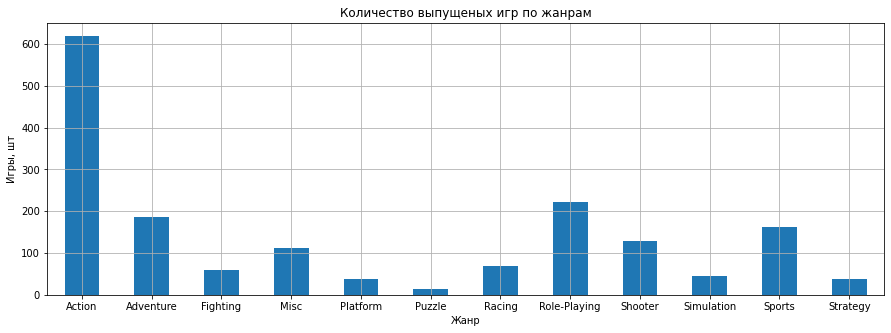

In [57]:
#Узнаем количество игр в каждой категории
print('Количество продаж игр в зависимости от жанра:')
print(actual_data.groupby('genre')['total_sales'].count().sort_values(ascending = False))


#построим по данным график
actual_data.groupby('genre')['total_sales'].count().plot(kind = 'bar', figsize = (15,5),grid = True)

plt.xticks(rotation = 0)
plt.title('Количество выпущеных игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Игры, шт')

Количество продаж игр в зависимости от жанра:
genre
Shooter         0.515
Sports          0.180
Platform        0.140
Fighting        0.125
Role-Playing    0.110
Simulation      0.100
Action          0.090
Misc            0.090
Racing          0.090
Strategy        0.060
Puzzle          0.045
Adventure       0.030
Name: total_sales, dtype: float64


Text(0, 0.5, 'Продажи, млн копий')

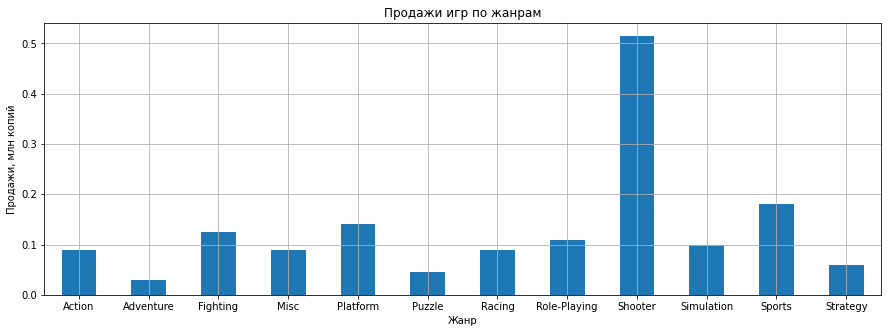

In [58]:
#определим продажи игр в зависимости от жанра
print('Количество продаж игр в зависимости от жанра:')
print(actual_data.groupby('genre')['total_sales'].median()
      .sort_values(ascending = False))

#построим по данным график
actual_data.groupby('genre')['total_sales'].median().plot(kind = 'bar', figsize = (15,5),grid = True)

plt.xticks(rotation = 0)
plt.title('Продажи игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Продажи, млн копий')

In [59]:
#узнаем средние рейтинги Критиков и Пользователей в зависимости от жанров
(actual_data.pivot_table(index = 'genre',  values = ['user_score','critic_score'], aggfunc = 'median')
 .sort_values ('user_score',ascending = False))

,critic_score,user_score
genre,,
Puzzle,75.5,7.95
Role-Playing,75.5,7.60
Adventure,72.0,7.50
Fighting,71.0,7.40
Strategy,80.0,7.30
Platform,78.0,7.20
Action,72.0,7.10
Misc,76.0,7.00
Simulation,71.5,6.95


**Вывод по пункту 3.1.9:**

Согласно проведенному анализу, к наиболее популярным жанрам можно отнести:
- Shooter (медианные продажи **435** тыс. копий)
- Sports (медианные продажи **240** тыс. копий)
- Platform (медианные продажи **210** тыс. копий)
- Role-Playing (медианные продажи **140** тыс. копий)

Также можно выделить жанры с самыми низкими медианными продажами:
- Puzzle (медианные продажи **45** тыс. копий)
- Adventure (медианные продажи **30** тыс. копий)

При этом ситуация с рейтингами является обратной, например игры жанра **Puzzle** имеют наивысший пользовательский рейтинг.

Данная ситуация возможно связана с тем, что из-за не высокой популярности данного жанра основными покупателями выступают преданные фанаты, которые в свою очередь высоко оценивают игры, а у более популярных игр более размытая аудитория, кому-то игры нравятся, кому-то нет.

При этом сильно выделяется низкий пользовательский рейтинг у жанра **Sports** - при этом он на 4 месте по продажам, возможно связано с тем, что игры из этого жанра стали разочаровывать прежних фанатов отсутствием изменений и наличием багов. 

Но в целом можно отметить, что рейтинг критиков примерно находится в одном диапазоне - от 70 до 80 - достаточно высокий, а вот пользовательский рейтинг более вариативен и находится в градации от 5.7 до 7.9.

#### **Вывод по разделу 3.1**

В рамках данного раздела была получена важная для планирования компании информация:
1. Определен актуальный период выхода игр -  с 2014 по 2016 гг.
2. Получено понимание что среднее время существования платформы (за исключением PC) - составляет 9-12 лет, однако новые поколения платформ появляются каждые 7-8 лет.
3. На рынке преобладают 3 типа консолей: 
- PlayStation; 
- XBox; 
- Nintendo. 

При этом популярность PlayStation растет.

4. Больше всего в актуальном периоде было продано копий по платформам PS4, XOne и 3DS
5. Имеется зависимость между оценками и продажами игр - игры с лучшими оценками покупают чаще.
6. Пользователи предпочитают игры с рейтингом ESRB - M(«Mature») - для взрослых.
7. К наиболее популярным жанрам относятся:
- Shooter;
- Sports
- Platform
- Role-Playing;


Далее проанализируем типовых пользователей каждого региона

### Составьте портрет пользователя каждого региона

В рамках данного раздела будут определен портрет среднестатистического пользователя для каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

#### Самые популярные платформы (топ-5)

Рассмотрим продажи по платформам в разных регионах и построим общий график

Продажи по платформам в каждом регионе:
          eu_sales  jp_sales  na_sales
platform                              
3DS          16.12     44.24     22.64
PC           17.97      0.00      7.23
PS3          25.54     11.22     22.05
PS4         130.04     15.02     98.61
PSP           0.00      0.36      0.00
PSV           3.58     14.61      2.63
Wii           2.59      0.00      2.08
WiiU         13.15      7.31     19.36
X360         15.49      0.08     28.30
XOne         46.25      0.32     81.27 



Text(0, 0.5, 'Продажи, млн копий')

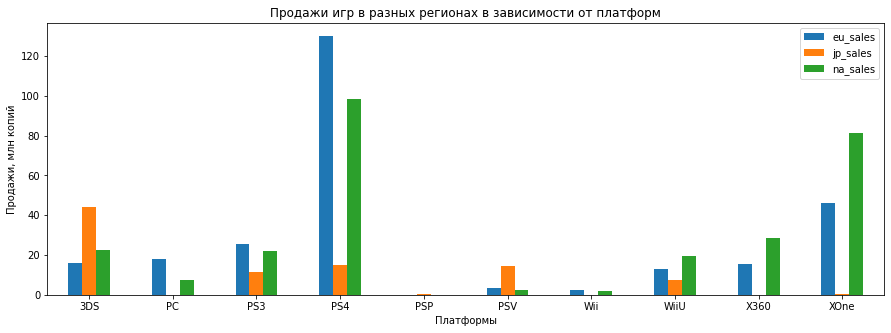

In [60]:
#рассмотрим самые популярные платформы
print('Продажи по платформам в каждом регионе:')
print(actual_data.pivot_table(index = 'platform', values = ['na_sales','eu_sales', 'jp_sales'], aggfunc = 'sum'),'\n')

#Построим график
(actual_data.pivot_table(index = 'platform', values = ['na_sales','eu_sales', 'jp_sales'], aggfunc = 'sum')
 .plot(kind = 'bar', figsize = (15,5)))

plt.xticks(rotation = 0)
plt.title('Продажи игр в разных регионах в зависимости от платформ')
plt.xlabel('Платформы')
plt.ylabel('Продажи, млн копий')

В целом из-за специфики игровой культуру продажи игр в разных регионах очень разняться, более детально проанализируем каждый регион

##### Самые популярные платформы (топ-5) - Северная Америка

Рассмотрим данные о продажах в Северной Америке, для этого в качестве значения укажем параметр `na_sales`

Продажи по платформам в Северной Америке:
          na_sales
platform          
PS4          98.61
XOne         81.27
X360         28.30
3DS          22.64
PS3          22.05 



Text(0, 0.5, 'Продажи, млн копий')

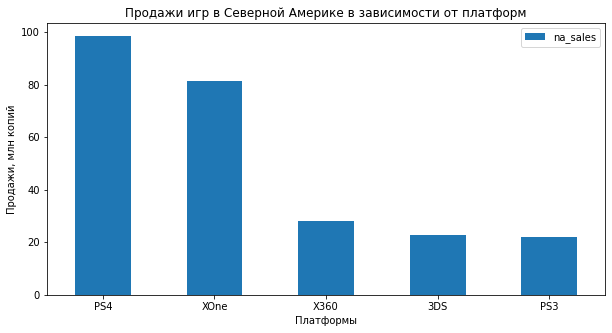

In [61]:
#рассмотрим самые популярные платформы
print('Продажи по платформам в Северной Америке:')
print(actual_data.pivot_table(index = 'platform', values = ['na_sales'], aggfunc = 'sum')
      .sort_values(by = 'na_sales', ascending = False).head(),'\n')

#Построим график
(actual_data.pivot_table(index = 'platform', values = ['na_sales'], aggfunc = 'sum')
 .sort_values(by = 'na_sales', ascending = False).head()
 .plot(kind = 'bar', figsize = (10,5)))

plt.xticks(rotation = 0)
plt.title('Продажи игр в Северной Америке в зависимости от платформ')
plt.xlabel('Платформы')
plt.ylabel('Продажи, млн копий')

##### Самые популярные платформы (топ-5) - Европа

Рассмотрим данные о продажах в Европе, для этого в качестве значения укажем параметр `eu_sales`

Продажи по платформам в Европе:
          eu_sales
platform          
PS4         130.04
XOne         46.25
PS3          25.54
PC           17.97
3DS          16.12 



Text(0, 0.5, 'Продажи, млн копий')

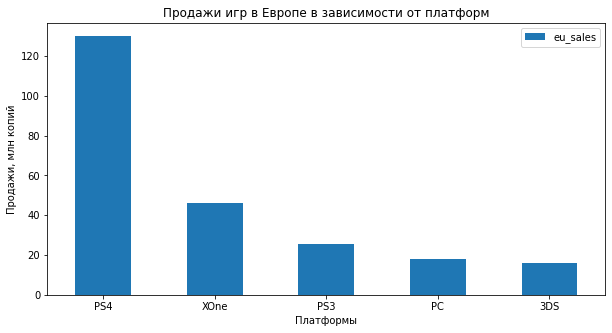

In [62]:
#рассмотрим самые популярные платформы
print('Продажи по платформам в Европе:')
print(actual_data.pivot_table(index = 'platform', values = ['eu_sales'], aggfunc = 'sum')
      .sort_values(by = 'eu_sales', ascending = False).head(),'\n')

#Построим график
(actual_data.pivot_table(index = 'platform', values = ['eu_sales'], aggfunc = 'sum')
 .sort_values(by = 'eu_sales', ascending = False).head()
 .plot(kind = 'bar', figsize = (10,5)))

plt.xticks(rotation = 0)
plt.title('Продажи игр в Европе в зависимости от платформ')
plt.xlabel('Платформы')
plt.ylabel('Продажи, млн копий')

##### Самые популярные платформы (топ-5) - Япония

Рассмотрим данные о продажах в Японии, для этого в качестве значения укажем параметр `jp_sales`

Продажи по платформам в Японии:
          jp_sales
platform          
3DS          44.24
PS4          15.02
PSV          14.61
PS3          11.22
WiiU          7.31 



Text(0, 0.5, 'Продажи, млн копий')

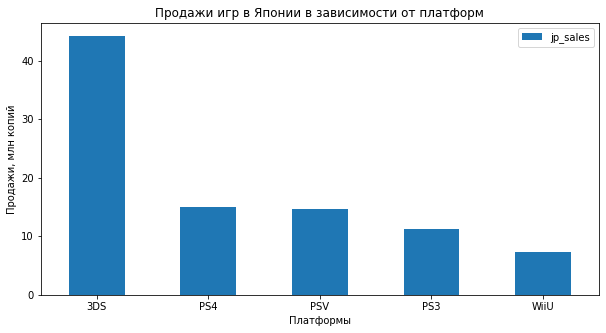

In [63]:
#рассмотрим самые популярные платформы
print('Продажи по платформам в Японии:')
print(actual_data.pivot_table(index = 'platform', values = ['jp_sales'], aggfunc = 'sum')
      .sort_values(by = 'jp_sales', ascending = False).head(),'\n')

#Построим график
(actual_data.pivot_table(index = 'platform', values = ['jp_sales'], aggfunc = 'sum')
 .sort_values(by = 'jp_sales', ascending = False).head()
 .plot(kind = 'bar', figsize = (10,5)))

plt.xticks(rotation = 0)
plt.title('Продажи игр в Японии в зависимости от платформ')
plt.xlabel('Платформы')
plt.ylabel('Продажи, млн копий')

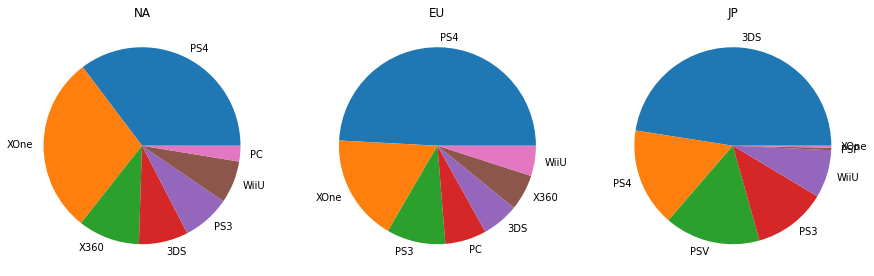

In [64]:
regions = actual_data.columns[4:7]
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i in range(len(regions)):
  df_i = (actual_data.groupby('platform')[regions[i]].sum().
             reset_index().
             sort_values(regions[i], ascending = False).
             head(7))
  axs[i].pie(df_i[regions[i]], labels = df_i['platform'])
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

##### **Вывод по пункту 3.2.1:**

Игровая культура в каждом регионе достаточно разная, так можно отметить:
- в Северной Америке большей популярностью пользуется платформа **SonyPlaystation 4**
- В Европе большей популярностью пользуется платформа **SonyPlaystation 4**
- В Японии большей популярностью пользуется платформа **Nintendo 3DS**

Xbox - это игровое подразделение Microsoft - компании, расположенной в Северной Америке, соответственно пользователи этого региона останавливают выбор на местном производителе, несмотря на то, что лидирует **PS4**, **XOne** отстает не сильно, а на третьем месте находится **X360**.

Nintendo - Японская компания, в связи с этим эта платформа пользуется большей популярностью на родине.

При этом интересно отметить, что в Японии полностью отсутствуют игроки PC - японцы предпочитают платформы. При этом только в Японии в топ-5 входят небольшие портативные платформы - **PSV**, **WiiU**. Японские пользователи, видимо, более мобильны и предпочитают небольшие игровые консоли.

Также стоит отметить, что в Америке и Европе в ТОП-5 входят одни и те же платформы, однако предпочтения у пользователей разные.

#### Самые популярные жанры (топ-5)

Рассмотрим продажи по жанрам в разных регионах и построим общий график

Продажи по жанрам в каждом регионе:
              eu_sales  jp_sales  na_sales
genre                                     
Action           0.020      0.01     0.010
Adventure        0.000      0.01     0.000
Fighting         0.020      0.03     0.040
Misc             0.010      0.01     0.010
Platform         0.055      0.00     0.075
Puzzle           0.000      0.03     0.000
Racing           0.050      0.00     0.030
Role-Playing     0.010      0.05     0.020
Shooter          0.220      0.00     0.220
Simulation       0.030      0.00     0.000
Sports           0.050      0.00     0.070
Strategy         0.010      0.00     0.000 



Text(0, 0.5, 'Продажи, млн копий')

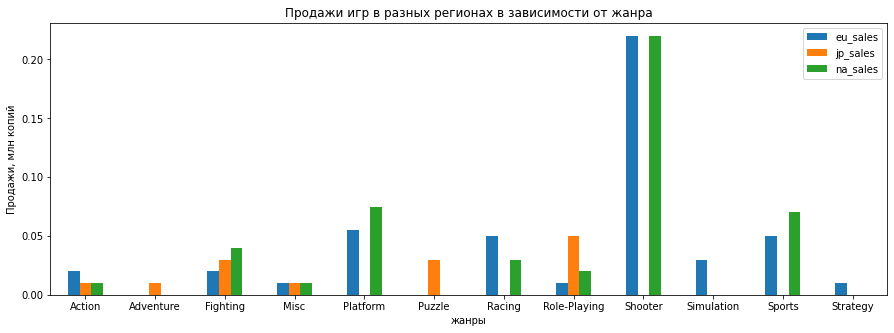

In [65]:
#рассмотрим самые популярные жанры
print('Продажи по жанрам в каждом регионе:')
print(actual_data.pivot_table(index = 'genre', values = ['na_sales','eu_sales', 'jp_sales'], aggfunc = 'median'),'\n')

#Построим график
(actual_data.pivot_table(index = 'genre', values = ['na_sales','eu_sales', 'jp_sales'], aggfunc = 'median')
 .plot(kind = 'bar', figsize = (15,5)))

plt.xticks(rotation = 0)
plt.title('Продажи игр в разных регионах в зависимости от жанра')
plt.xlabel('жанры')
plt.ylabel('Продажи, млн копий')

В целом из-за специфики игровой культуру продажи игр в разных регионах очень разняться, более детально проанализируем каждый регион

##### Самые популярные жанры (топ-5) - Северная Америка

Рассмотрим данные о продажах в Северной Америке, для этого в качестве значения укажем параметр `na_sales`

Продажи по жанрам в Северной Америке:
          na_sales
genre             
Shooter      0.220
Platform     0.075
Sports       0.070
Fighting     0.040
Racing       0.030 



Text(0, 0.5, 'Продажи, млн копий')

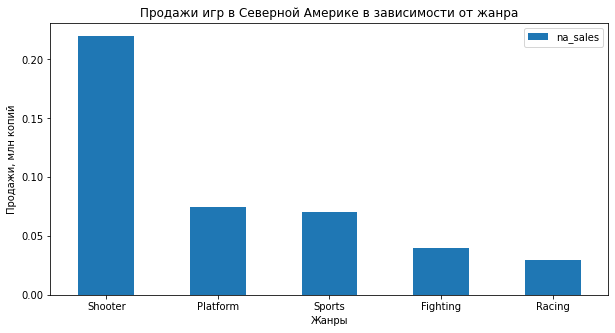

In [66]:
#рассмотрим самые популярные жанры
print('Продажи по жанрам в Северной Америке:')
print(actual_data.pivot_table(index = 'genre', values = ['na_sales'], aggfunc = 'median')
      .sort_values(by = 'na_sales', ascending = False).head(),'\n')

#Построим график
(actual_data.pivot_table(index = 'genre', values = ['na_sales'], aggfunc = 'median')
 .sort_values(by = 'na_sales', ascending = False).head()
 .plot(kind = 'bar', figsize = (10,5)))

plt.xticks(rotation = 0)
plt.title('Продажи игр в Северной Америке в зависимости от жанра')
plt.xlabel('Жанры')
plt.ylabel('Продажи, млн копий')

##### Самые популярные жанры (топ-5) - Европа

Рассмотрим данные о продажах в Европе, для этого в качестве значения укажем параметр `eu_sales`

Продажи по жанрам в Европе:
            eu_sales
genre               
Shooter        0.220
Platform       0.055
Racing         0.050
Sports         0.050
Simulation     0.030 



Text(0, 0.5, 'Продажи, млн копий')

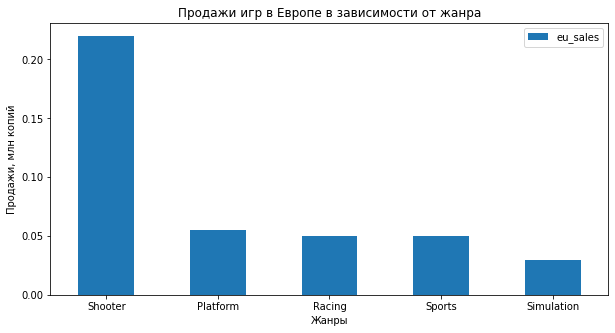

In [67]:
#рассмотрим самые популярные жанры
print('Продажи по жанрам в Европе:')
print(actual_data.pivot_table(index = 'genre', values = ['eu_sales'], aggfunc = 'median')
      .sort_values(by = 'eu_sales', ascending = False).head(),'\n')

#Построим график
(actual_data.pivot_table(index = 'genre', values = ['eu_sales'], aggfunc = 'median')
 .sort_values(by = 'eu_sales', ascending = False).head()
 .plot(kind = 'bar', figsize = (10,5)))

plt.xticks(rotation = 0)
plt.title('Продажи игр в Европе в зависимости от жанра')
plt.xlabel('Жанры')
plt.ylabel('Продажи, млн копий')

##### Самые популярные жанры (топ-5) - Япония

Рассмотрим данные о продажах в Японии, для этого в качестве значения укажем параметр `jp_sales`

Продажи по жанрам в Японии:
              jp_sales
genre                 
Role-Playing      0.05
Fighting          0.03
Puzzle            0.03
Action            0.01
Adventure         0.01 



Text(0, 0.5, 'Продажи, млн копий')

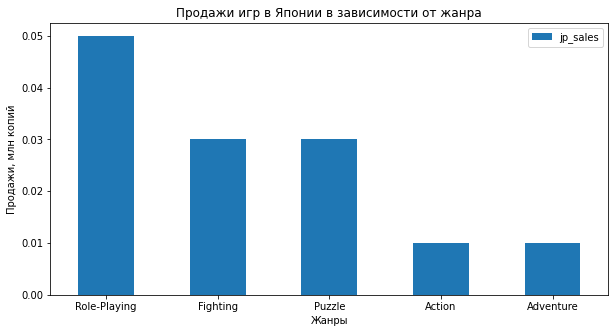

In [68]:
#рассмотрим самые популярные жанры
print('Продажи по жанрам в Японии:')
print(actual_data.pivot_table(index = 'genre', values = ['jp_sales'], aggfunc = 'median')
      .sort_values(by = 'jp_sales', ascending = False).head(),'\n')

#Построим график
(actual_data.pivot_table(index = 'genre', values = ['jp_sales'], aggfunc = 'median')
 .sort_values(by = 'jp_sales', ascending = False).head()
 .plot(kind = 'bar', figsize = (10,5)))

plt.xticks(rotation = 0)
plt.title('Продажи игр в Японии в зависимости от жанра')
plt.xlabel('Жанры')
plt.ylabel('Продажи, млн копий')

##### **Вывод по пункту 3.2.2:**

В сравнении по трем регионам, общие тенденции сохраняются для Европы и Северной Америки, у представителей японской аудитории предпочтительными являются несколько другие жанры.

Согласно проведенному анализу были выделены следующие тенденции для регионов:
1. Интересы аудиторий из Европы и Северной Америки совпадают, они предпочитают игры жанров:
- Shooter;
- Platform;
- Sport;
- Racing.

2. В Японии на первом месте стоит жанр **Role-Playing**, а жанры **Shooter** и **Sport** не попали в топ-5.

#### Влияние рейтинга ESRB на продажи в отдельном регионе

Для понимания влияния узнаем зависимость рейтинга и продаж, а также пострим графики для каждого региона

Зависимость продаж в регионах от рейтинга
                       eu_sales  jp_sales  na_sales
rating_describtion                                 
Everyone                  58.06      8.94     50.74
Everyone 10 and older     26.16      4.46     33.23
Mature                    93.44      8.01     96.42
No Rating                 58.95     56.90     64.72
Teen                      34.12     14.85     39.06


/tmp/ipykernel_139/2561255077.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  actual_data.groupby(['rating_describtion'])['eu_sales','jp_sales','na_sales'].sum()
/tmp/ipykernel_139/2561255077.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  actual_data.groupby(['rating_describtion'])['eu_sales','jp_sales','na_sales'].sum().plot(kind = 'bar', figsize = (10,5))


Text(0, 0.5, 'Продажи в регионах, млн копий')

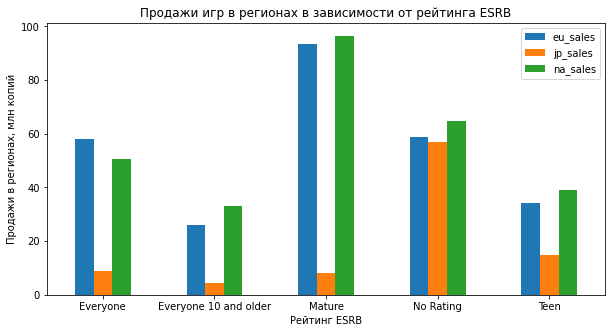

In [69]:
#узнаем зависимость продаж и рейтинга в разных регионах
print('Зависимость продаж в регионах от рейтинга')
print(actual_data.pivot_table(index = 'rating_describtion', values = ['na_sales','eu_sales','jp_sales'], aggfunc = 'sum'))
actual_data.groupby(['rating_describtion'])['eu_sales','jp_sales','na_sales'].sum()

#построим график
actual_data.groupby(['rating_describtion'])['eu_sales','jp_sales','na_sales'].sum().plot(kind = 'bar', figsize = (10,5))

plt.xticks(rotation = 0)
plt.title ('Продажи игр в регионах в зависимости от рейтинга ESRB')
plt.xlabel ('Рейтинг ESRB')
plt.ylabel ('Продажи в регионах, млн копий')

**Вывод по пункту 3.2.3:**

Из проведенного анализа было выявлено:
1. В Японии в большей степени пользователи приобретают игры не имеющие оценок ESRB, так из анализа видно, что в данном регионе в большей степени лидируют продажи с отсутствующим рейтингом (NR).
2. При Анализе Европы и Северной Америки можно видеть, что чаще всего покупают игры с рейтингом M(Mature), также в тройку входят игры без рейтинга ESRB и игры с рейтингом E(Everyone).

#### **Вывод по разделу 3.2**

На основе проведенного анализа можно составить портреты среднестатистических пользователей в зависимости от региона:

1. Среднестатистический пользователь из Северной Америки:
- В качестве основной платформы предпочитает **PS4**;
- Любимый жанр игр - **Shooter**;
- Выбирает игры с рейтингом ESRB - **Mature**.

2. Среднестатистический пользователь из Европы:
- В качестве основной платформы предпочитает **PS4**;
- Любимый жанр игр - **Shooter**;
- Выбирает игры с рейтингом ESRB - **Mature**.

3. Среднестатистический пользователь из Японии:
- В качестве основной платформы предпочитает **3DS**;
- Любимый жанр игр - **Role-Playing**;
- Не сильно ориентируется на рейтинг ESRB.

Данные были основаны на ТОП-1 значениях продаж в зависимости от платформ и жанров игр для каждого региона.

### Проверка гипотез

В рамках данного раздела будут проверены две гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

#### Проверка гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

В рамках данного пункта будет проверена гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Сформулируем нулевую и альтернативную гипотезу:

H0: Рейтинг пользователей (`user_score`) для платформы **Xbox** и **PC** равен друг другу.

H1: Рейтинг пользователей (`user_score`) для платформы **Xbox** и **PC** не равны друг другу.

Альтернативную гипотезу можно трактовать, как рейтинг пользователей платформы **XBox** больше рейтинга **PC**, так и рейтинг пользователей платформы **XBox** меньше рейтинга **PC** - данная альтернативная гипотеза является двусторонней, так как есть возможное отклонение и в большую, и в меньшую стороны.  

В таком случае необходимо использовать метод проверки двусторонней гипотезы: t-test сравнивая две генеральные совокупности.

Пороговое значение alpha = 0.05

In [70]:
#сохраним выборки в переменные platform_xone и platform_pc
platform_xone = actual_data.query('platform == "XOne"')['user_score'].dropna()
platform_pc = actual_data.query('platform == "PC"')['user_score'].dropna()

#задаем уровень статистической важности
alpha = 0.05

#определим уровень значимости для данной статистики
results_1 = st.ttest_ind(platform_xone,platform_pc)

#выведем уровень значимости на экран
print('p-значение:', results_1.pvalue)

#произведем проверку нулевой гепотезы
if results_1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


#### Проверка гипотезы: Средние пользовательские рейтинги жанров Action и Sports разные.

В рамках данного пункта будет проверена гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные.

Сформулируем нулевую и альтернативную гипотезу: 

H0: Рейтинг пользователей (`user_score`) для жанров **Action** и **Sports** равен друг другу. 

H1: Рейтинг пользователей (`user_score`) для платформы **Action** и **Sports** не равны друг другу.

нулевую гипотезу можно трактовать, как рейтинг пользователей для жанра **Action** больше рейтинга **Sports**, так и рейтинг пользователей платформы **Action** меньше рейтинга **Sports** - данная нулевая гипотеза является двусторонней, так как есть возможное отклонение и в большую, и в меньшую стороны.

В таком случае необходимо использовать метод проверки двусторонней гипотезы: t-test сравнивая две генеральные совокупности.
При этом совокупности не являются зависимыми.

Пороговое значение alpha = 0.05

In [71]:
#сохраним выборки в переменные genre_action и genre_sports
genre_action = actual_data.query('genre == "Action"')['user_score'].dropna()
genre_sports = actual_data.query('genre == "Sports"')['user_score'].dropna()

#определим уровень значимости для данной статистики
results_2 = st.ttest_ind(genre_action,genre_sports)


#выведем уровень значимости на экран
print('p-значение:', results_2.pvalue)

#произведем проверку нулевой гипотезы
if results_2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


### **Вывод по разделу 3.3:**

При проверке гипотез были получены следующие результаты:

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые:

Согласно проведенному исследованию нулевую гипотезу о том, что рейтинг пользователей (`user_score`) для платформы Xbox и PC равен друг другу не получилось отвергнуть. Таким образом гипотеза о том, что оценки у платформ одинаковые - подтверждается

2. Средние пользовательские рейтинги жанров Action и Sports разные

Согласно проведенному исследованию отвергаем нулевую гипотезу о том, что рейтинг пользователей (`user_score`) для жанров Action и Sports равен друг другу. Таким образом гипотеза о том что оценки у жанров разные - подтверждается.

## Общие выводы по выполненному проекту

В рамках данного проекта была проведена работа по анализу данных с целью построения компании продаж на следующий год для интернет-магазина "Стримчик". 

Результатом работы является ряд выводов по трем разделам:

1. **Исследование общих паттернов в анализируемом игровом сегменте**

Было установлено, что наиболее актуальный сегмент игр относится к периоду 2014-2016 гг. Наибольшей популярностью пользуются 3 типа консолей: `PlayStation`, `XBox`, `Nintendo`. В среднем консоли обновляются раз в 7-8 лет,и на текущий момент вышли новые поколения. Доля продаж у SonyPlaystation в мире растет - наибольшие продажи приходятся на PS4 и XOne. При этом пользователи обращают внимание на оценки критиков и других пользователей и предпочитают игры с более высокими оценками. 

Если говорить о жанрах игр - то большей популярностью пользуются жанры `Shooter`, `Platform`, `Role-Playing`, `Sports`.

2. **Изучение портрета пользователя каждого региона**

В целом культура гейминга в разных регионах достаточно разная. Пользователи Северной Америки предпочитают платформы типа SonyPlaystation и Xbox, как и представители Европейской аудитории, Японские пользователи - Nintendo. В зависимости от вида платформ в то в Европе и Америке пользуются популярностью последние поколения предпочтительных платформ, при это и там и там представлены `X360`, `XOne`, `PS4`, `PS3` ,`3DS`. 

Представители Японии отдают больше внимания более портативным консолям, таким как `3DS`, `PSV`, `WiiU`, однако также популярны и `PS3`, `PS4`.

Если говорить о жанрах, то тут также культуры европейских и американских пользователей очень похожи и соответствуют общемировым тенденциям ( `Shooter`, `Platform`, `Sports`), однако пользователи из Японии в большей мере ценят игры жанра `Role-Playing`)

3. **Проверка гипотез** 

Были проверены две гипотезы, в отношении оценки пользователей. Было выявлено, что оценки пользователей для платформ `XOne` и `PC` одинаковые, а оценки жанров `Action` и `Sports` разные. Данные зависимости в целом прослеживаются в ходе всего исследования.

**Рекомендации:**

При планировании компании продаж на следующий год интернет-магазину "Стримчик" стоит учитывать следующие тенденции:
1. Большей популярностью в мире пользуются игры на платформах 3х основных типов консолей (`PlayStation`, `XBox`, `Nintendo`). При этом акцент стоит делать на последних поколениях.
2. Продажи варьируют в зависимости от региона, но чтобы покрыть больший объем рынка рекомендуется отдавать большее предпочтения играм на `PlayStation`, `XBox`, при этом `PlayStation` лидирует в мире по продажам.
3. Игры с более высокими оценками от критиков и пользователей пользуются большей популярностью, но отсутствие оценки у игры не всегда является плохим знаком.
4. В отношении рейтинга ESRB стоит уделять больше внимание играм с рейтингом M(«Mature») — «Для взрослых» и E(«Everyone») — «Для всех». Но опять таки стоит учитывать, что отсутствие рейтинга не всегда является плохим знаком.
5. Акцент стоит сделать на наиболее популярных жанрах ( `Shooter`, `Platform`, `Role-Playing`, `Sports`), в целом они популярны по всему миру, но есть региональные особенности.
